<a href="https://colab.research.google.com/github/vzeizer/PUCRIO_Sprint1/blob/master/MVP_EDA_SalesPriceBrazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Boas Práticas e Análise de Dados

- Prof: Tatiane Escovedo

- MVP: Gas Prices in Brazil (Data: Dezembro/2023)


In [2]:
import warnings
warnings.filterwarnings("ignore")
!pip install unidecode
# para converter notebook em .pdf
#!pip install nbconvert
#!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
#!jupyter nbconvert --to pdf MVP_EDA_SalesPriceBrazil.ipynb

In [ ]:
# bibliotecas para análise de dados
import numpy as np
import pandas as pd
import pprint

# bibliotecas para visualizações
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FuncFormatter

# biblioteca para visualização de mapas/coordenadas geográficas
import geopandas as gpd

# biblioteca para analisar dados faltantes
import missingno as msno

# biblioteca para lidar com problemas de codificação
from unidecode import unidecode

# PCA e t-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Min-Max Scaler


# MinMaxScaler and Split into Train and Test
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:
# abreviações dos estados utilizados nos geomapas
state_abbreviations = {
    'ACRE': 'AC',
    'ALAGOAS': 'AL',
    'AMAPA': 'AP',
    'AMAZONAS': 'AM',
    'BAHIA': 'BA',
    'CEARA': 'CE',
    'DISTRITO FEDERAL': 'DF',
    'ESPIRITO SANTO': 'ES',
    'GOIAS': 'GO',
    'MARANHAO': 'MA',
    'MATO GROSSO': 'MT',
    'MATO GROSSO DO SUL': 'MS',
    'MINAS GERAIS': 'MG',
    'PARA': 'PA',
    'PARAIBA': 'PB',
    'PARANA': 'PR',
    'PERNAMBUCO': 'PE',
    'PIAUI': 'PI',
    'RIO DE JANEIRO': 'RJ',
    'RIO GRANDE DO NORTE': 'RN',
    'RIO GRANDE DO SUL': 'RS',
    'RONDONIA': 'RO',
    'RORAIMA': 'RR',
    'SANTA CATARINA': 'SC',
    'SAO PAULO': 'SP',
    'SERGIPE': 'SE',
    'TOCANTINS': 'TO'
}
# inflação acumulada
inflacao = [0.0,5.7,8.9,13.4,19.3,23.6,30.5,36.0,41.8,48.0,54.3,63.3,70.0,75.4,79.1,82.8,86.0,93.1]


***Inflação Acumulada desde 2004***:

- 2004: 0.0%
- 2005: 5.7%
- 2006: 8.9%
- 2007: 13.4%
- 2008: 19.3%
- 2009: 23.6%
- 2010: 30.5%
- 2011: 36.0%
- 2012: 41.8%
- 2013: 48.0%
- 2014: 54.3%
- 2015: 63.3%
- 2016: 70.0%
- 2017: 75.4%
- 2018: 79.1%
- 2019: 82.8%
- 2020: 86.0%
- 2021: 93.1%

# Informações sobre o Conjunto de Dados

- O Conjunto de Dados foi obtido [deste link.](https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil/data)


## Sobre o Conjunto de Dados
Atualizações:
Os dados estão disponíveis de 2004 a maio de 2021.
Valores NULOS - np.nan - estão representados por -99999
Website oficial da ANP tem dados até Fevereiro de 2022, mas este conjunto de dados é semanalmente organizado.

## Algortimo de Aprendizado de Máquina

Tendo em vista a predição de Preço, ou outra medida estatística, de Revenda em termos dos de Distribuição, esse é um problema de **aprendizado supervisionado**. É claro que se fossemos fazer algum tipo de predição, seja por *Machine Learning* ou *Modelos estatísticos*, teríamos que remover determinados atributos altamente correlacionados.

## Os Dados
A Agência Natural de Petróleo, Gás Natural e Bio-combustíveis (ANP) disponibiliza relatórios mensais de preços de gás, diesel e outros combustíveis usado no transporte através do Brasil. Esses dados carregam informações sobre o valor médio por litro, número de estações de combustíveis analisadas e outras informações agrupadas por regiões e estados através do país.

## Fonte
Como dito anteriormente, esses dados são disponibilizados pela ANP, e são atualizados regularmente com novas datas e informações - as quais são encontradas aqui em português.

## O que pode ser feito com esses dados?
Como regiões diferentes do Brazil vêem preços de combustíveis mudar?
Dentro de uma região, quais estados aumentam mais seus preços?
Quais estados são os mais baratos (ou mais caros) para diferentes tipos de combustíveis?

## **Descrição do Problema de Negócios**

**Distribuição de Combustíveis**:

A distribuição de combustíveis é a parte da cadeia de suprimento de combustíveis que envolve o transporte e a entrega dos produtos petrolíferos, como gasolina, diesel, gás natural, entre outros, dos locais de produção ou importação para os postos de abastecimento e outros pontos de consumo. Essa etapa abrange várias atividades, como o transporte por dutos, caminhões-tanque, navios ou ferrovias, o armazenamento em terminais e a entrega nos postos de combustível e instalações industriais.

**Impacto na Sociedade**:

A distribuição de combustíveis tem impacto direto na sociedade por vários motivos:

1. **Acessibilidade e Mobilidade**: A eficiência da distribuição de combustíveis afeta diretamente a disponibilidade de combustíveis nos postos de abastecimento. Qualquer interrupção no fornecimento de combustíveis pode afetar a mobilidade das pessoas, o transporte de mercadorias e a economia em geral.

2. **Preços dos Combustíveis**: Os custos associados à distribuição, como transporte e armazenamento, afetam os preços dos combustíveis. Flutuações nos preços de distribuição podem se refletir nos preços que os consumidores pagam nos postos de abastecimento.

3. **Sustentabilidade Ambiental**: A distribuição eficiente pode reduzir o consumo de combustível nos processos de transporte, minimizando as emissões de gases de efeito estufa. Além disso, vazamentos de combustíveis durante o transporte representam riscos ambientais significativos.

4. **Segurança Energética**: A distribuição confiável e contínua de combustíveis é essencial para garantir a segurança energética de um país. Qualquer interrupção no abastecimento pode ter consequências graves.

5. **Conformidade Regulatória**: A distribuição de combustíveis deve cumprir regulamentações rigorosas em termos de qualidade, segurança e ambientais. O não cumprimento dessas regulamentações pode ter sérias repercussões.

**Revenda de Combustíveis**:

A revenda de combustíveis é a etapa final da cadeia de abastecimento, envolvendo a venda direta de combustíveis aos consumidores em postos de abastecimento. Os postos de combustível podem ser operados por grandes empresas de petróleo ou proprietários independentes.

**Impacto na Sociedade**:

A revenda de combustíveis também tem impacto na sociedade:

1. **Preços ao Consumidor**: Os postos de abastecimento definem os preços finais dos combustíveis para os consumidores. Esses preços podem variar amplamente e afetar diretamente os custos de locomoção das pessoas e o transporte de mercadorias.

2. **Conveniência e Serviços**: Os postos de abastecimento oferecem serviços adicionais, como lojas de conveniência, banheiros e manutenção de veículos. Isso afeta a comodidade e a experiência dos consumidores.

3. **Qualidade dos Combustíveis**: A revenda de combustíveis deve garantir que os produtos oferecidos atendam aos padrões de qualidade e segurança. Combustíveis de baixa qualidade podem prejudicar o desempenho dos veículos e a qualidade do ar.

4. **Concorrência e Escolhas do Consumidor**: A concorrência entre postos de abastecimento afeta a escolha do consumidor. A presença de várias opções permite que os consumidores comparem preços e serviços.

Em resumo, a distribuição e revenda de combustíveis desempenham papéis cruciais na garantia do acesso a combustíveis, na determinação de preços para os consumidores e na conformidade com regulamentações ambientais e de segurança. Essas atividades têm um impacto direto na mobilidade, na economia, na sustentabilidade e na segurança energética da sociedade. Portanto, são de interesse público e sujeitas a regulamentação e monitoramento rigorosos.

##  **Dicionário de Dados**

### DATA INICIAL: Dia da Análise;
### DATA FINAL: Último dia da análise semanal;
### REGIÃO: Região brasileira em que os dados foram analisados;
### ESTADO: Estado em que os dados foram analisados;
### PRODUTO: Combustível ou gás a ser analisado;
### NÚMERO DE POSTOS PESQUISADOS: Número de postos pesquisados no período;
### UNIDADE DE MEDIDA: Unidade em que o Produto foi Medido;
### PREÇO MÉDIO REVENDA: Preço Médio de Revenda do Produto;
### DESVIO PADRÃO REVENDA: Desvio Padrão de Revenda do Produto;
### PREÇO MÍNIMO REVENDA: Preço Mínimo de Revenda do Produto;
### PREÇO MÁXIMO REVENDA: Preço Máximo de Revenda do Produto;
### MARGEM MÉDIA REVENDA: Margem Média de Revenda do Produto;
### COEF DE VARIAÇÃO REVENDA: Coeficiente de Variação de Revenda do Produto;
### PREÇO MÉDIO DISTRIBUIÇÃO: Preço Médio de Distribuição do Produto;
### DESVIO PADRÃO DISTRIBUIÇÃO: Desvio Padrão de Distribuição do Produto;
### PREÇO MÍNIMO DISTRIBUIÇÃO: Preço Mínimo de Distribuição do Produto;
### PREÇO MÁXIMO DISTRIBUIÇÃO: Preço Máximo de Distribuição do Produto;
### COEF DE VARIAÇÃO DISTRIBUIÇÃO:  Coeficiente de Variação de Distribuição do Produto;

## O que é Coeficiente de Variação?

### O coeficiente de variação (CV) é uma medida estatística que expressa a variabilidade relativa de um conjunto de dados em relação à média. Ele é utilizado para comparar a dispersão de diferentes conjuntos de dados, independentemente de suas unidades de medida. O coeficiente de variação é calculado pela seguinte fórmula:

##  **CV = (Desvio Padrão/Média)*100**

### O coeficiente de variação é especialmente útil quando se deseja comparar a variabilidade de conjuntos de dados com médias diferentes ou em unidades diferentes. Ele fornece uma medida relativa de dispersão, permitindo uma comparação mais significativa do que simplesmente comparar os desvios padrão brutos.

### Em termos gerais, um coeficiente de variação baixo indica que a variabilidade em torno da média é pequena em relação à própria média, enquanto um coeficiente de variação alto sugere uma maior dispersão relativa dos dados em relação à média.



## **Algumas Perguntas a Serem Respondidas:**

1. Quais são as Regiões Brasileiras que tiveram o maior número de postos pesquisados, em média?
2. Quais foram os Produtos (combustíveis) com maior resposta no período de estudo?
3. Como variou o número de repostas por Região, Estado e Unidade de Medida?
4. Como está a distribuição dos atributos? Há valores extremos? A que se assemelha essas distribuições? Como varia a faixa de valores coletados por atributo para diferentes unidades de medida, produtos, regiões e estados?
5. Como varia, em uma escala de mapa de cores, os valores do Preço de Distribuição e Revenda para diferentes Produtos (Combustíveis) e Unidades de Medida no Brasil? Quais os estados com os Preços maiores e menores, em média?
6. Como varia a Média de Postos Pesquisados por Ano para diferentes unidades de medida?
7. Como se comporta a Média de Preço de Distribuição e Revenda por Ano para diferentes Produtos (Combustíveis)? E para o Preço Máximo e Mínimo de Distribuição e Revenda por Produto?
8. Como varia o Preço Médio de Distribuição e Revenda com o passar dos anos para diferentes Produtos (Combustíveis)? Há como estabelecer alguma relação matemática, do tipo de regressão polinomial, entre a variação do Preço Médio com os anos? E se compararmos a variação do Preço desde 2004 (ano inicial da Pesquisa) com a Inflação acumulada no período?
9. Há como visualizar os dados utilizando gráficos bidimensionais, mas mantendo o máximo possível de informação?


## Restrições e Condições Respeitadas



- Os dados explorados nesse trabalho foram obtidos do Kaggle, conforme dito acima, entre 2004 e 2022.
- Consideramos que os números de postos pesquisados, de onde cada estatística referente, por exemplo, a produto (combustível) ou unidade de medida foi computada e gráficos criados, são suficientes para serem consideradas amostras representativas da população.
- Os resultados da Análise desses dados são somente válidos para estados Brasileiros, não podendo ser extendidos a outros países, devido à forma da pesquisa e condições da própria população brasileira.
- Outros atributos, que não estão no conjunto de dados, podem influenciar consideravelmente os resultados, como fatores regionais e locais, tanto quanto fatores políticos e geopolíticos.

# Análise Exploratória

## Lendo o Conjunto de Dados

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/vzeizer/PUCRIO_Sprint1/master/2004-2021.tsv", delimiter='\t')


In [ ]:
df.head(20)

DATA INICIAL  DATA FINAL        REGIÃO               ESTADO  \
0    2004-05-09  2004-05-15  CENTRO OESTE     DISTRITO FEDERAL   
1    2004-05-09  2004-05-15  CENTRO OESTE                GOIAS   
2    2004-05-09  2004-05-15  CENTRO OESTE          MATO GROSSO   
3    2004-05-09  2004-05-15  CENTRO OESTE   MATO GROSSO DO SUL   
4    2004-05-09  2004-05-15      NORDESTE              ALAGOAS   
5    2004-05-09  2004-05-15      NORDESTE                BAHIA   
6    2004-05-09  2004-05-15      NORDESTE                CEARA   
7    2004-05-09  2004-05-15      NORDESTE             MARANHAO   
8    2004-05-09  2004-05-15      NORDESTE              PARAIBA   
9    2004-05-09  2004-05-15      NORDESTE           PERNAMBUCO   
10   2004-05-09  2004-05-15      NORDESTE                PIAUI   
11   2004-05-09  2004-05-15      NORDESTE  RIO GRANDE DO NORTE   
12   2004-05-09  2004-05-15      NORDESTE              SERGIPE   
13   2004-05-09  2004-05-15         NORTE                 ACRE   
14   2004-05-09  2004-05-15         NORTE                AMAPA   
15   2004-05-09  2004-05-15         NORTE             AMAZONAS   
16   2004-05-09  2004-05-15         NORTE                 PARA   
17   2004-05-09  2004-05-15         NORTE             RONDONIA   
18   2004-05-09  2004-05-15         NORTE              RORAIMA   
19   2004-05-09  2004-05-15         NORTE            TOCANTINS   

             PRODUTO  NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  \
0   ETANOL HIDRATADO                           127              R$/l   
1   ETANOL HIDRATADO                           387              R$/l   
2   ETANOL HIDRATADO                           192              R$/l   
3   ETANOL HIDRATADO                           162              R$/l   
4   ETANOL HIDRATADO                           103              R$/l   
5   ETANOL HIDRATADO                           408              R$/l   
6   ETANOL HIDRATADO                           278              R$/l   
7   ETANOL HIDRATADO                           105              R$/l   
8   ETANOL HIDRATADO                           125              R$/l   
9   ETANOL HIDRATADO                           423              R$/l   
10  ETANOL HIDRATADO                            89              R$/l   
11  ETANOL HIDRATADO                           131              R$/l   
12  ETANOL HIDRATADO                            57              R$/l   
13  ETANOL HIDRATADO                            33              R$/l   
14  ETANOL HIDRATADO                            15              R$/l   
15  ETANOL HIDRATADO                            53              R$/l   
16  ETANOL HIDRATADO                           104              R$/l   
17  ETANOL HIDRATADO                            97              R$/l   
18  ETANOL HIDRATADO                            14              R$/l   
19  ETANOL HIDRATADO                            71              R$/l   

    PREÇO MÉDIO REVENDA  DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  \
0                 1.288                  0.016                 1.190   
1                 1.162                  0.114                 0.890   
2                 1.389                  0.097                 1.180   
3                 1.262                  0.070                 1.090   
4                 1.181                  0.078                 1.050   
5                 1.383                  0.132                 0.999   
6                 1.453                  0.218                 1.030   
7                 1.631                  0.158                 1.350   
8                 1.284                  0.130                 1.100   
9                 1.224                  0.141                 0.989   
10                1.573                  0.134                 1.400   
11                1.276                  0.116                 1.090   
12                1.301                  0.109                 1.150   
13                1.805                  0.134                 1.500   
14                1.785

## Abaixo, são verificados os Tipo de Dados. Nota-se principalmente que as variáveis referentes a "Distribuição" estão com o tipo "object" e devem ser transformadas para o tipo "float64", o que será feito posteriormente.

In [ ]:
pprint.pprint(df.dtypes)

DATA INICIAL                      object
DATA FINAL                        object
REGIÃO                            object
ESTADO                            object
PRODUTO                           object
NÚMERO DE POSTOS PESQUISADOS       int64
UNIDADE DE MEDIDA                 object
PREÇO MÉDIO REVENDA              float64
DESVIO PADRÃO REVENDA            float64
PREÇO MÍNIMO REVENDA             float64
PREÇO MÁXIMO REVENDA             float64
MARGEM MÉDIA REVENDA              object
COEF DE VARIAÇÃO REVENDA         float64
PREÇO MÉDIO DISTRIBUIÇÃO          object
DESVIO PADRÃO DISTRIBUIÇÃO        object
PREÇO MÍNIMO DISTRIBUIÇÃO         object
PREÇO MÁXIMO DISTRIBUIÇÃO         object
COEF DE VARIAÇÃO DISTRIBUIÇÃO     object
dtype: object


## Verificando valores Duplicados. Felizmente, não temos valores duplicados no dataframe df.

In [ ]:
df.duplicated().sum()

0

## Dando um print nas colunas para sabermos quais são os atributos.

In [ ]:
# Obtém as colunas de df
cols_df = list(df.columns)

# Imprime as Colunas
pprint.pprint(cols_df)

['DATA INICIAL',
 'DATA FINAL',
 'REGIÃO',
 'ESTADO',
 'PRODUTO',
 'NÚMERO DE POSTOS PESQUISADOS',
 'UNIDADE DE MEDIDA',
 'PREÇO MÉDIO REVENDA',
 'DESVIO PADRÃO REVENDA',
 'PREÇO MÍNIMO REVENDA',
 'PREÇO MÁXIMO REVENDA',
 'MARGEM MÉDIA REVENDA',
 'COEF DE VARIAÇÃO REVENDA',
 'PREÇO MÉDIO DISTRIBUIÇÃO',
 'DESVIO PADRÃO DISTRIBUIÇÃO',
 'PREÇO MÍNIMO DISTRIBUIÇÃO',
 'PREÇO MÁXIMO DISTRIBUIÇÃO',
 'COEF DE VARIAÇÃO DISTRIBUIÇÃO']


## Limpando os Dados! Substituindo '-9999.0' e '-' por np.nan. Posteriormente, preencheremos os valores ausentes.

In [ ]:
def limpeza_dados(df):
  """
  Essa função faz uma limpeza básica de dados, substituindo '-9999.0'
  ou '-' por np.nan
  """
  # substitui '-9999.0' e '-' por nan
  df = df.replace('-99999.0',np.nan)
  df = df.replace('-',np.nan)

  return df

def arruma_tipo_colunas(df):
  """
  Essa função converte convenientemente algumas colunas em float
  """
  # pega as 7 primeiras colunas, separa as demais e converte no tipo float e, depois, concatena.
  df1 = df[df.columns[:7]]
  df2 = df[df.columns[7:]].astype(float)
  df = pd.concat([df1,df2],axis=1)

  return df

In [ ]:
# limpando os dados e, em seguida, arrumando as suas colunas
df = limpeza_dados(df)
df = arruma_tipo_colunas(df)

## Analisando os valores faltantes por columa em forma de gráfico de barras

<Axes: >

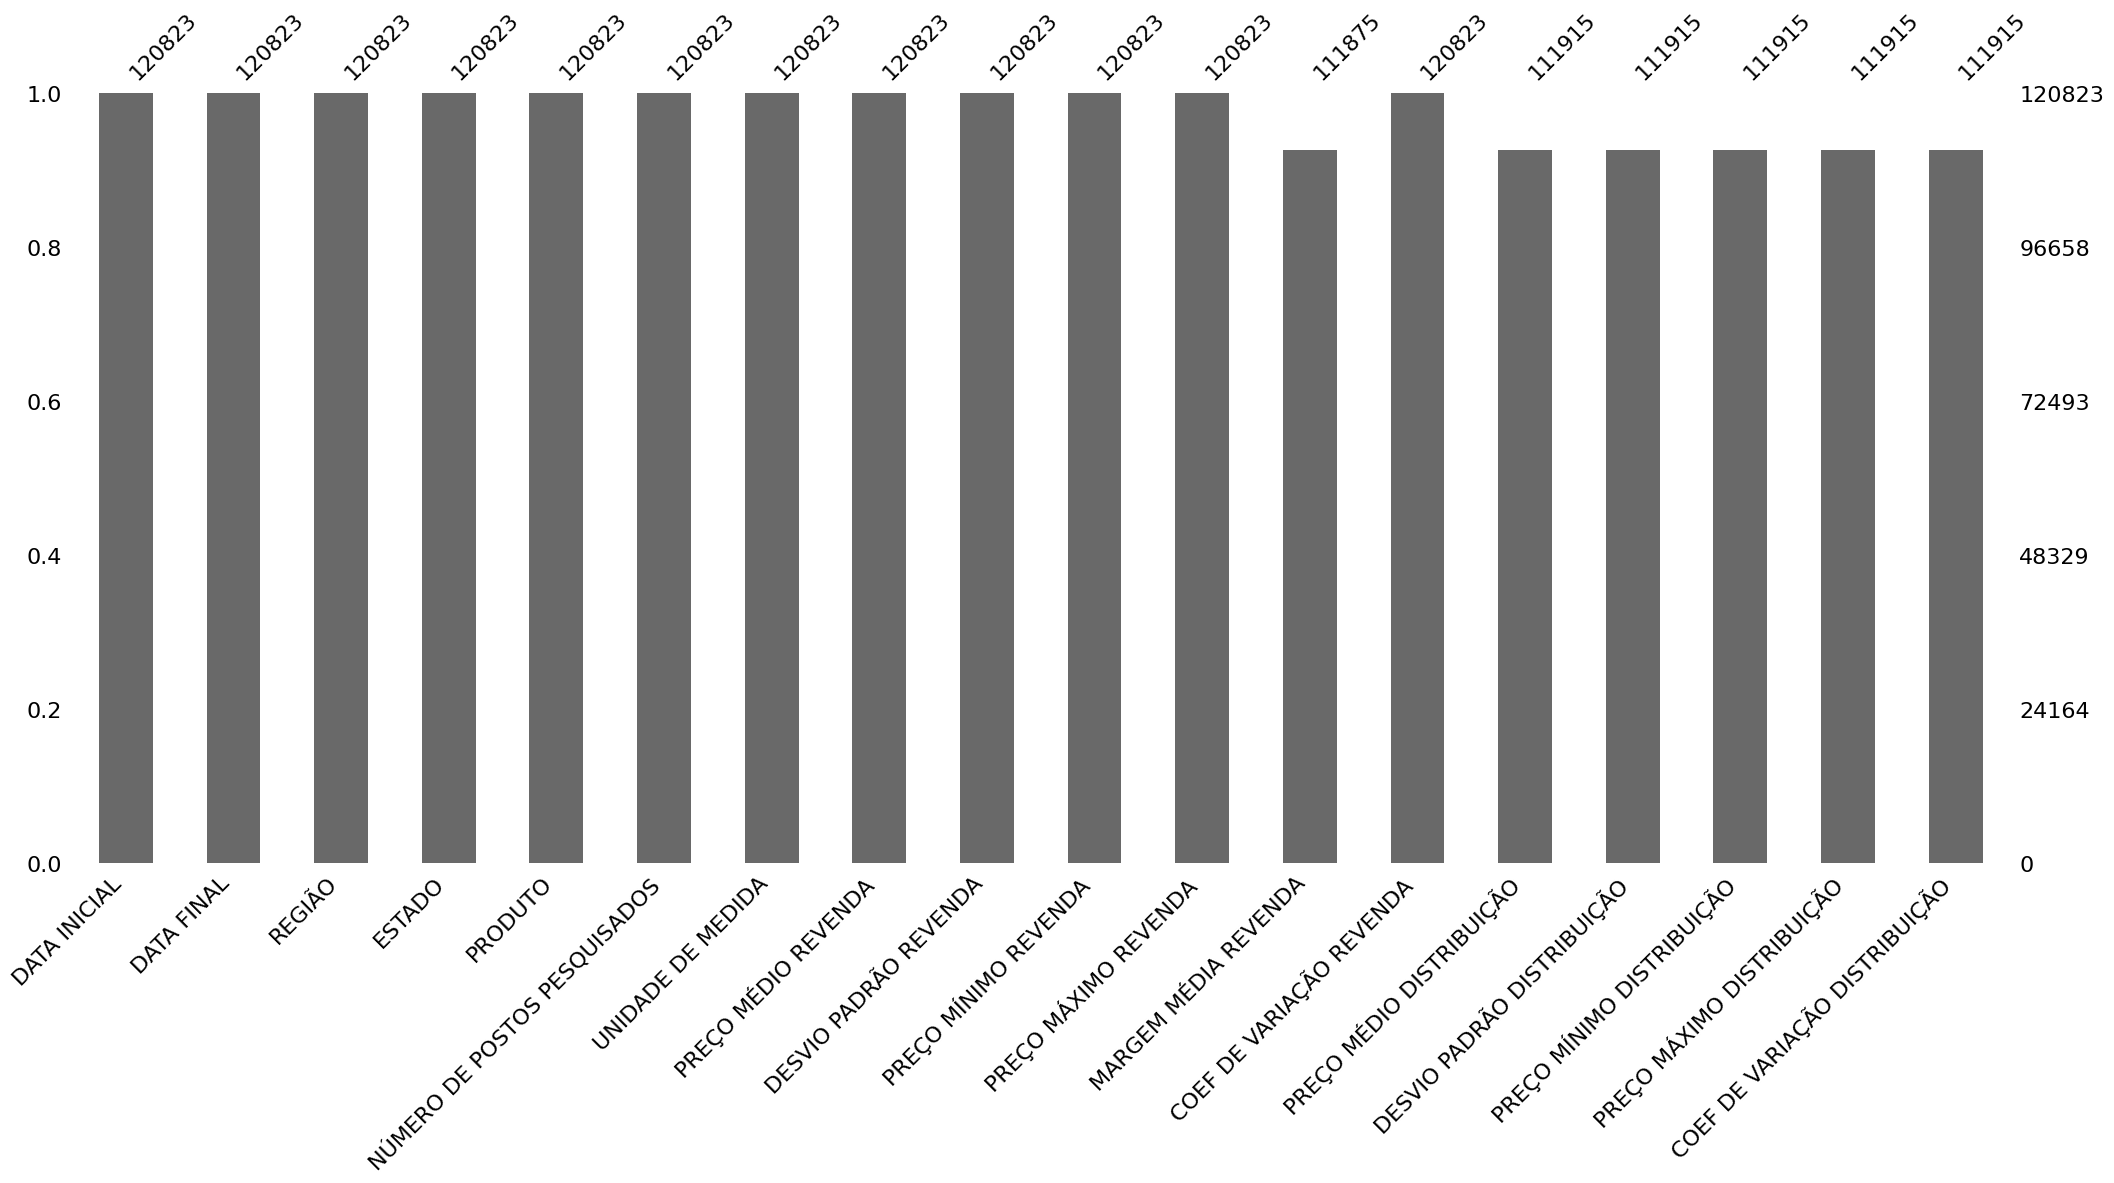

In [ ]:
msno.bar(df)

## Agora analisando os dados faltantes na forma matricial

<Axes: >

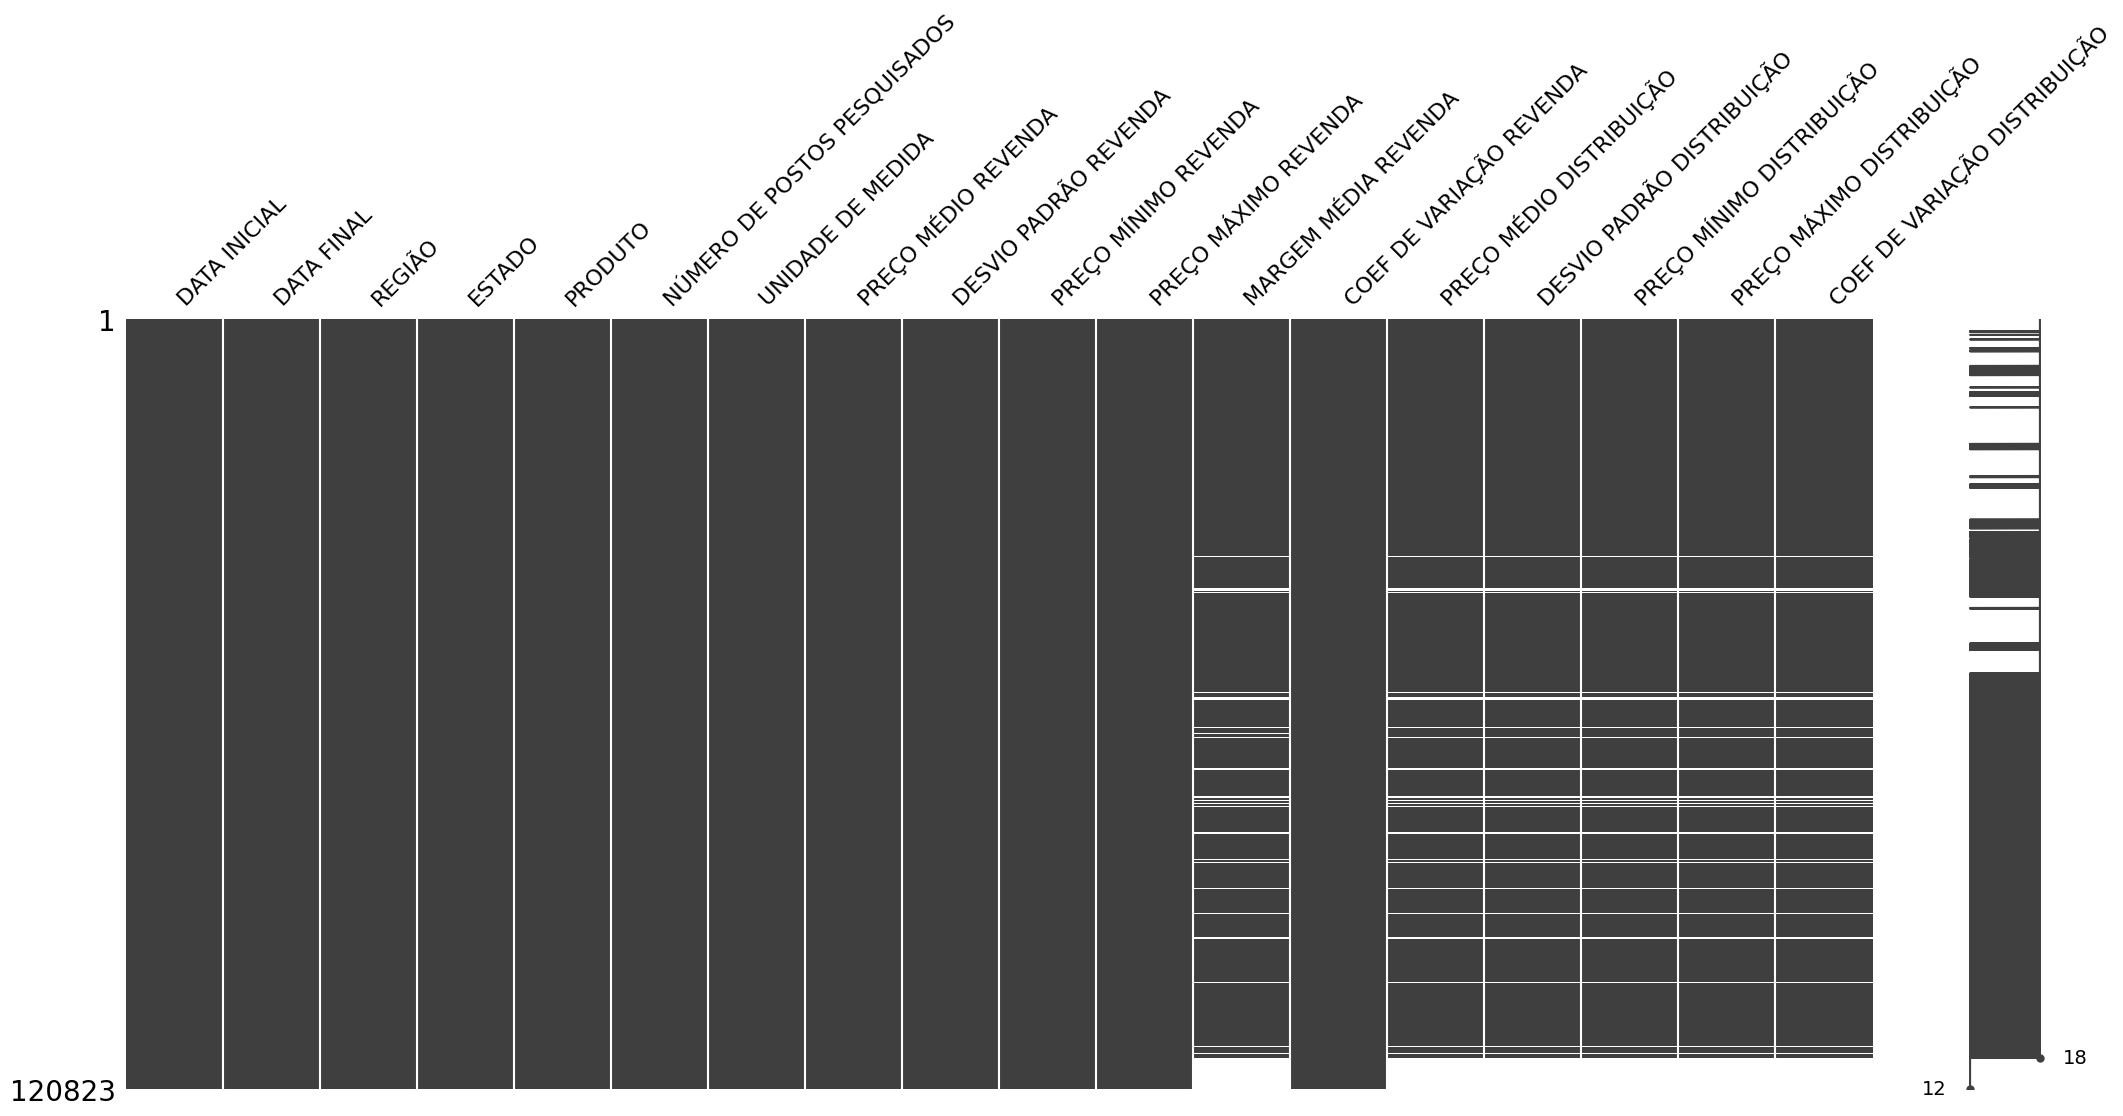

In [ ]:
msno.matrix(df)

## Analisando o total de nulos por coluna

In [ ]:
df.isnull().sum()

DATA INICIAL                        0
DATA FINAL                          0
REGIÃO                              0
ESTADO                              0
PRODUTO                             0
NÚMERO DE POSTOS PESQUISADOS        0
UNIDADE DE MEDIDA                   0
PREÇO MÉDIO REVENDA                 0
DESVIO PADRÃO REVENDA               0
PREÇO MÍNIMO REVENDA                0
PREÇO MÁXIMO REVENDA                0
MARGEM MÉDIA REVENDA             8948
COEF DE VARIAÇÃO REVENDA            0
PREÇO MÉDIO DISTRIBUIÇÃO         8908
DESVIO PADRÃO DISTRIBUIÇÃO       8908
PREÇO MÍNIMO DISTRIBUIÇÃO        8908
PREÇO MÁXIMO DISTRIBUIÇÃO        8908
COEF DE VARIAÇÃO DISTRIBUIÇÃO    8908
dtype: int64

In [ ]:
# selecionando as colunas numéricas de df
cols_numeric = list(df.select_dtypes(include=['number']).columns)

## O atributo "Produto" tem muitas categorias que tem significados semelhantes. Vamos transformar tipos de combustíveis em categorias mais gerais.

In [ ]:
# dicionário para transformação de atributos
replace_dict = {'GASOLINA COMUM': 'GASOLINA', 'GASOLINA ADITIVADA': 'GASOLINA','ÓLEO DIESEL':'ÓLEO','ÓLEO DIESEL S10':'ÓLEO', \
                'OLEO DIESEL':'ÓLEO', 'OLEO DIESEL S10':'ÓLEO'}

# Reduz o número de categorias do atributo Produto
df['PRODUTO'] = df['PRODUTO'].replace(replace_dict)

## Gráfico para computar o Número de Registros no Dataset por Produto

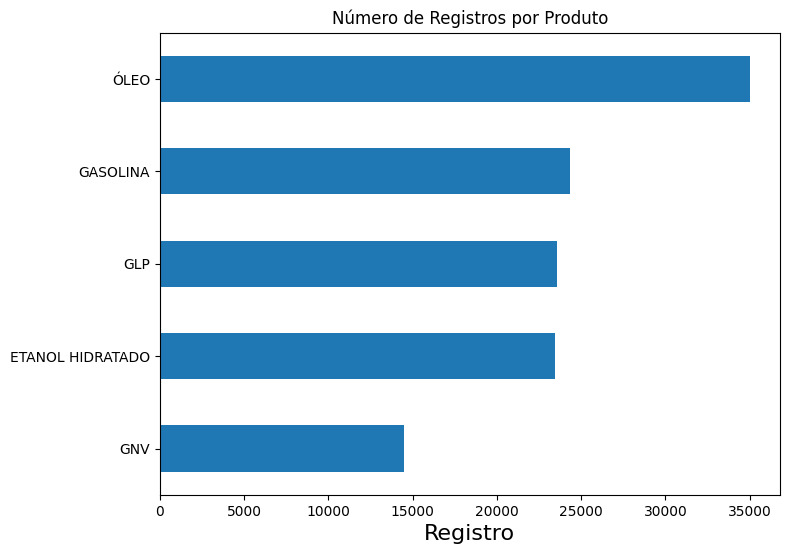

In [ ]:
plt.figure(figsize=[8,6])

df['PRODUTO'].value_counts().sort_values().plot(kind='barh')
plt.xlabel('Registro',size=16)
plt.title('Número de Registros por Produto')

plt.show()

## A partir do gráfico acima, nota-se que temos mais registros de Óleo e Gasolina e a categoria que tem menos registros é a GNV.

## Agora vamos analisar a distribuição das variáveis por meio de boxplots e violinplots.

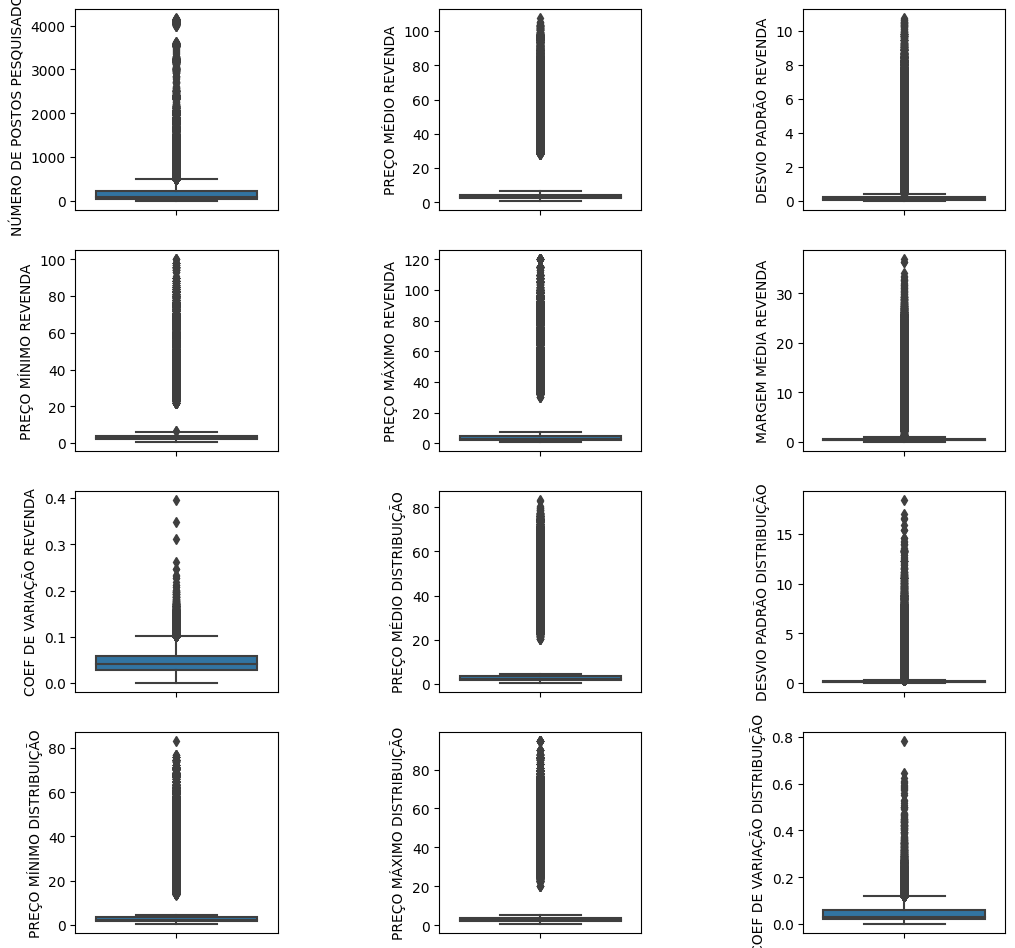

In [ ]:
# Cria um grid com duas linhas e três colunas

nrows = 4
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(12,12))
plt.subplots_adjust(wspace=0.8)

# Itera pelo grid plotando os gráficos
idx = 0
for row in range(nrows):
  for col in range(ncols):
    ax = axes[row, col]
    sns.boxplot(y=df[cols_numeric[idx]], data=df, ax=ax)
    idx += 1
plt.show()


## Dos gráficos acima, pode-se notar que os dados contém diversos outliers e que as distribuições são assimétricos à direita. Isso sugere que o preenchimento de valores faltantes deve ser feito utilizando a mediana, justamente por ser uma medida mais robusta a outliers do que a média.

## Os gráficos abaixo mostram boxplots para as variáveis númericas do conjuntos de dados, de onde podemos notar que os atributos referentes a Distribuição e Revenda tem faixa de valores bem diferentes para muitos atributos.

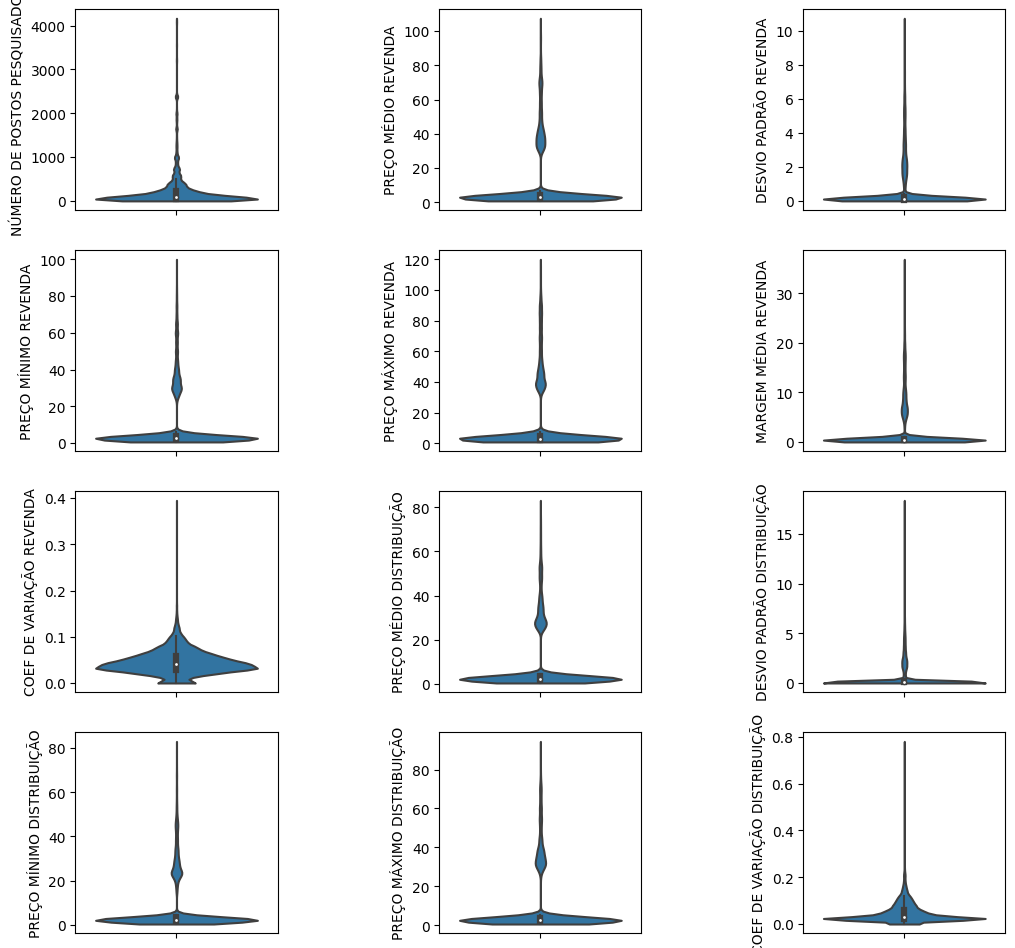

In [ ]:
# Cria um grid com quatro linhas e três colunas
nrows = 4
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(12,12))
plt.subplots_adjust(wspace=0.8)

# Itera pelo grid plotando os gráficos
idx = 0
for row in range(nrows):
  for col in range(ncols):
    ax = axes[row, col]
    sns.violinplot(y=df[cols_numeric[idx]],data=df,ax=ax,cut=0)
    idx += 1
plt.show()


## Os gráficos abaixo mostram violinplots das variáveis quantitativas do conjunto de dados em função da *região* de interesse. Pode-se notar que:
- Os preços médios de Distribuição e Revenda estão bem distribuídos entre as diferentes regiões brasileiras;
- O coeficiente de variação de Distribuição é maior no Sudeste, enquanto que para Revenda é maior no Norte;
- Com respeito ao número de postos pesquisados, os dados estão mais concentrados no Sudeste e Sul.

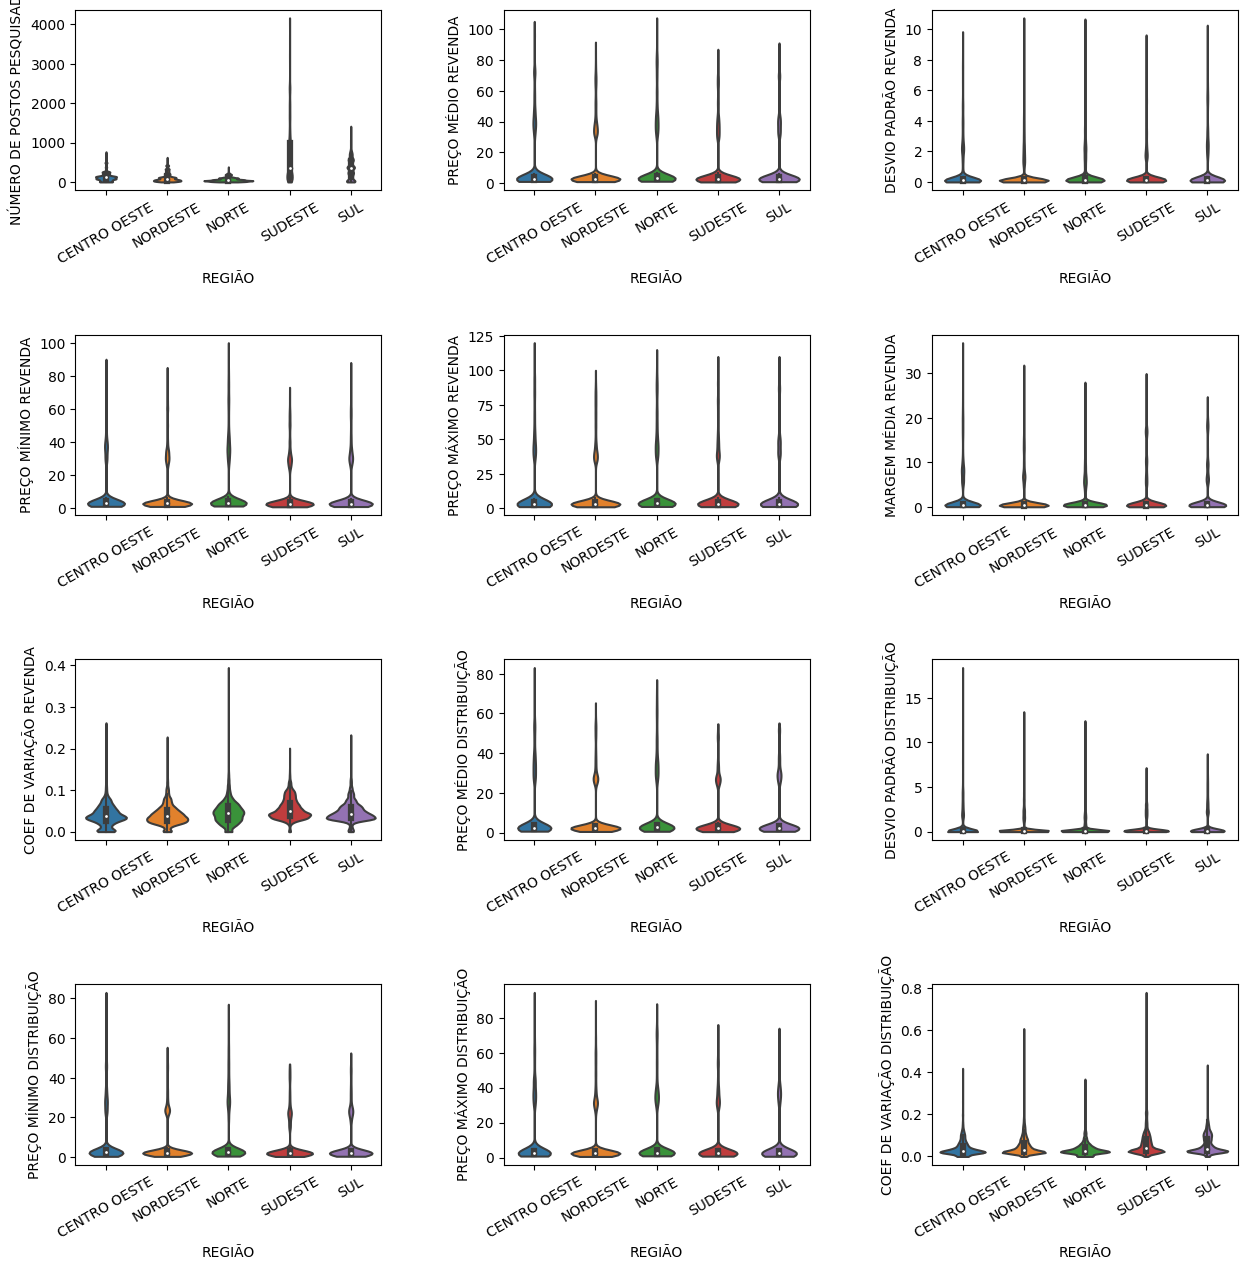

In [ ]:
# Cria um grid com quatro linhas e três colunas
nrows = 4
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(15,15))
plt.subplots_adjust(wspace=0.4,hspace=0.8)

# Itera pelo grid plotando os gráficos
idx = 0
for row in range(nrows):
  for col in range(ncols):
    ax = axes[row, col]
    sns.violinplot(y=df[cols_numeric[idx]],data=df,
                   ax=ax,cut=0,x='REGIÃO')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    idx += 1
plt.show()

## Os gráficos abaixo mostram violinplots das variáveis quantitativas do conjunto de dados em função do *combustível* (PRODUTO) de interesse. Pode-se notar que:
- Considerando o número de postos pesquisados, tem-se uma menor amplitude para GNV e GLP;
- o preço médio, assim como o desvio padrão, de Distribuição e Revenda é para maior para o GLP;
- com respeito ao coeficiente de variação para Distribuição, ele é mais disperso e tem maior média e mediana para GNV, enquanto que para Revenda, ele é mais disperso para GNV e tem média e mediana maior para GLP.

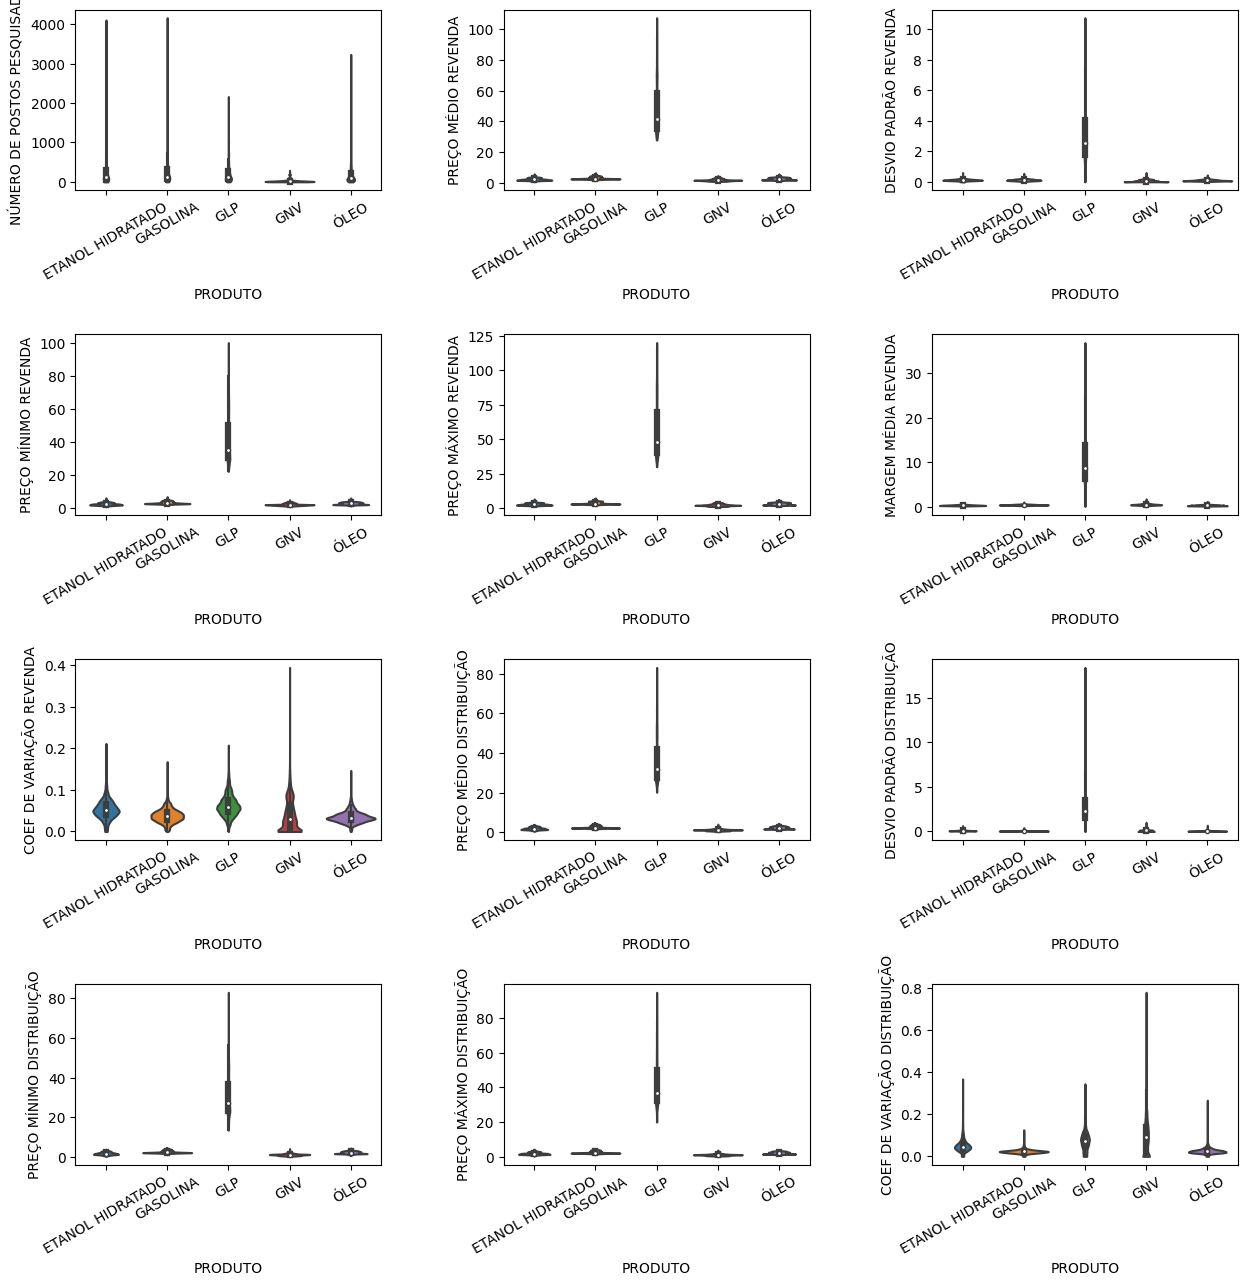

In [ ]:
# Cria um grid com quatro linhas e três colunas
nrows = 4
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(15,15))
plt.subplots_adjust(wspace=0.4,hspace=0.8)

# Itera pelo grid plotando os gráficos
idx = 0
for row in range(nrows):
  for col in range(ncols):
    ax = axes[row, col]
    sns.violinplot(y=df[cols_numeric[idx]],data=df,
                   ax=ax,cut=0,x='PRODUTO')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    idx += 1
plt.show()

## Os gráficos abaixo mostram violinplots das variáveis quantitativas do conjunto de dados em função da *unidade de medida* de interesse. Pode-se notar que:
- Considerando o número de postos pesquisados, houve um número relativamente pequeno de postos pesquisados com unidade de medida de R\$/m3;
- o preço médio, assim como o desvio padrão, de Distribuição e Revenda é mais disperso e tem média/mediana maior para a unidade de medida R\$/m3;
- com respeito ao coeficiente de variação para Distribuição e Revenda, ele é bem distribuído para as três unidades de medidas,mas para R\$/m3 ele é mais disperso.

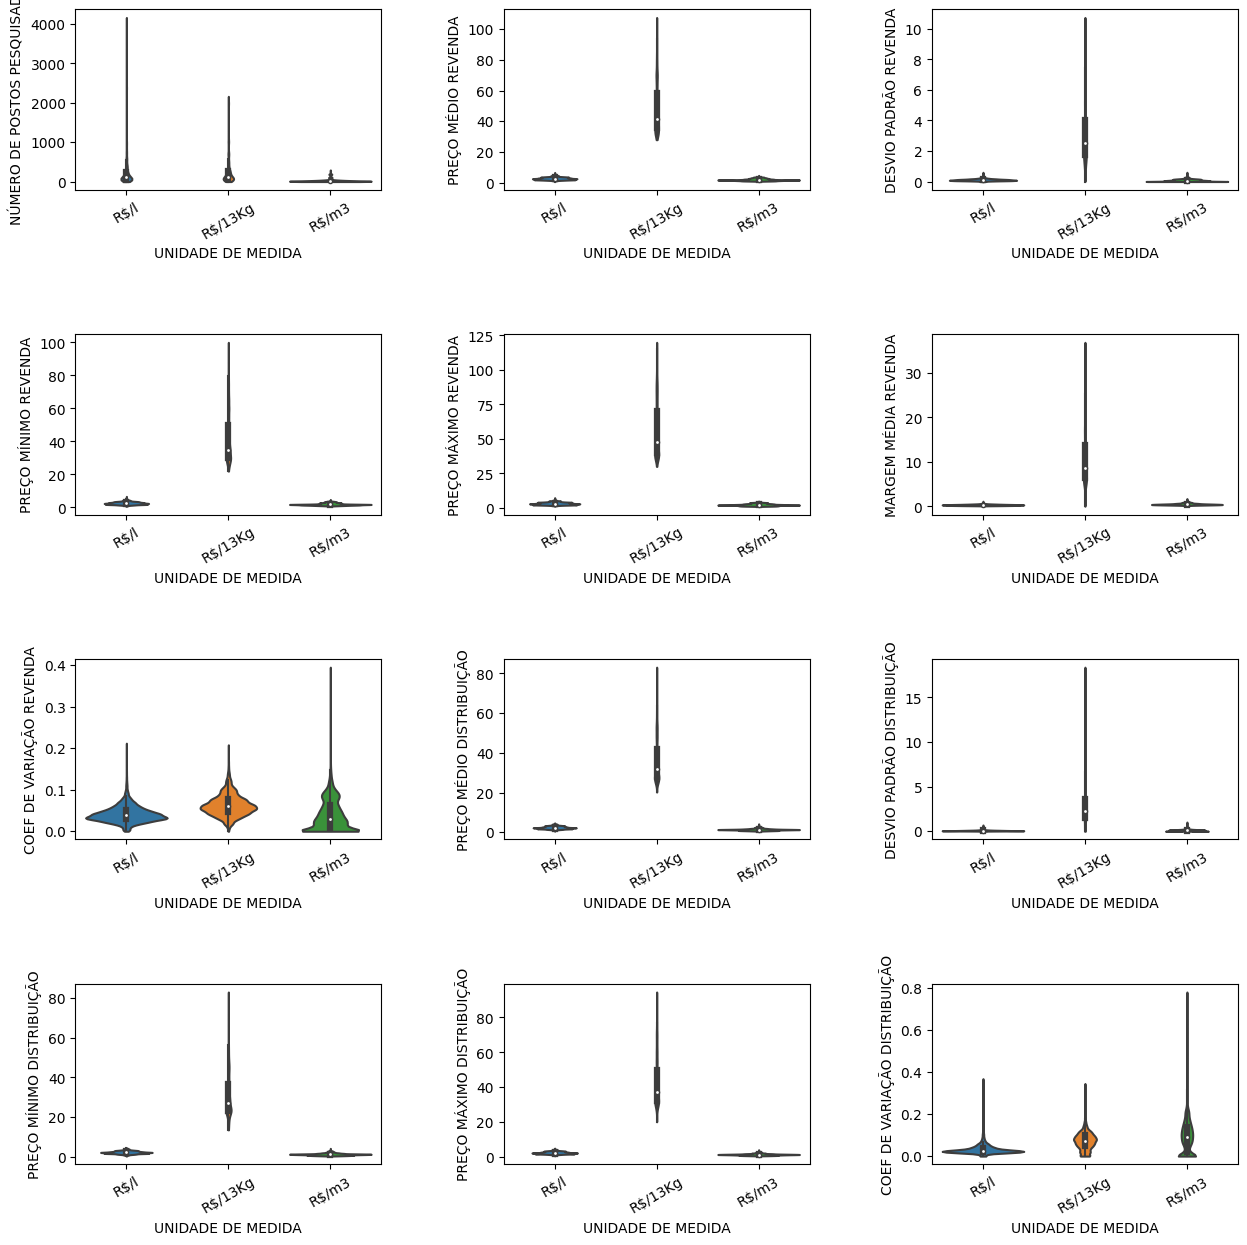

In [ ]:
# Cria um grid com quatro linhas e três colunas
nrows = 4
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(15,15))
plt.subplots_adjust(wspace=0.4,hspace=0.8)

# Itera pelo grid plotando os gráficos
idx = 0
for row in range(nrows):
  for col in range(ncols):
    ax = axes[row, col]
    sns.violinplot(y=df[cols_numeric[idx]],data=df,
                   ax=ax,cut=0,x='UNIDADE DE MEDIDA')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    idx += 1
plt.show()

## Abaixo, estão gráficos na forma de histogramas das variáveis numéricas de interesse. Pode-se notar que as distribuições são majoritariamente assimétricas à direita, o que reforça a necessidade de preencher valores inválidos ou ausentes com a mediana. Nota-se também que algumas distribuições podem se assemelhar à distribuição exponencial, ou gaussiana, ou log-normal, podendo até ser uma mistura de ambas com a gaussiana ou log-normal deslocadas com respeito à exponencial.

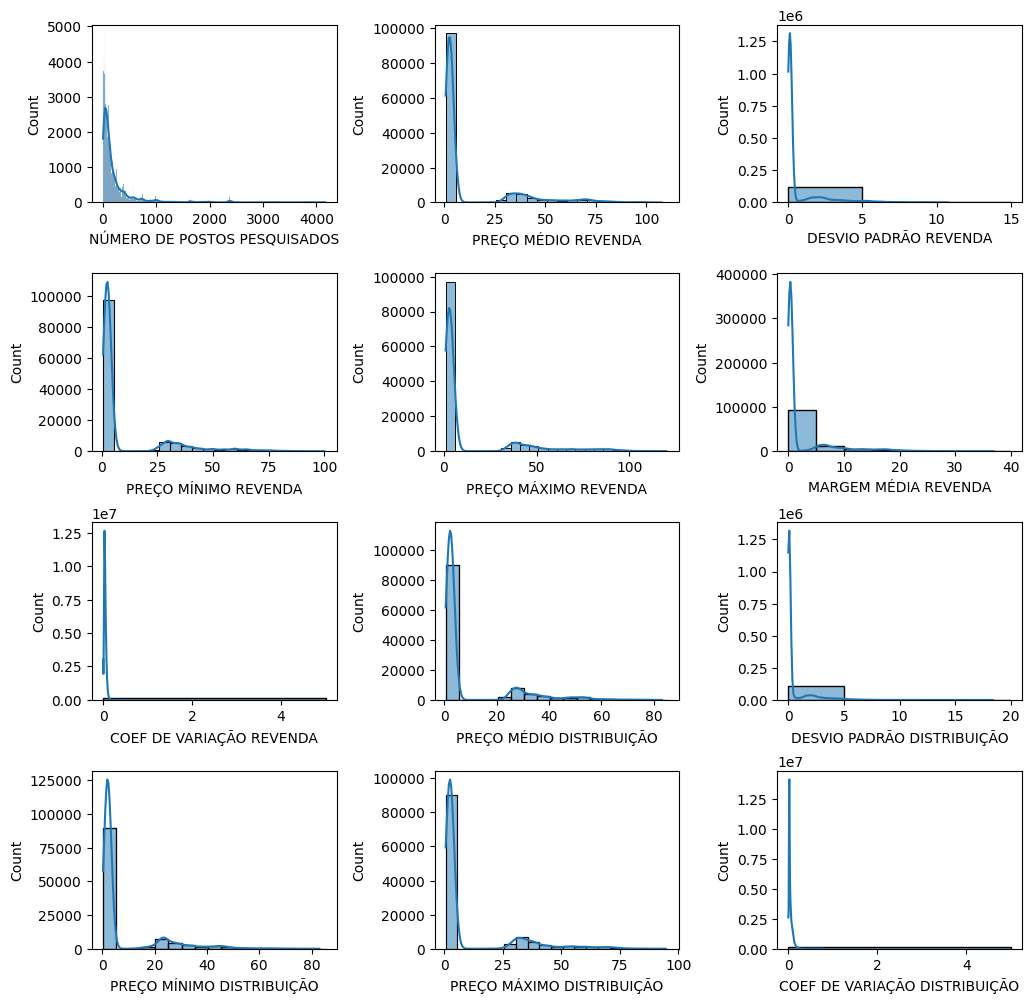

In [ ]:
# Cria um grid com quatro linhas e três colunas
nrows = 4
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(12,12))
plt.subplots_adjust(wspace=0.4,hspace=0.4)

# Itera pelo grid plotando os gráficos
idx = 0
for row in range(nrows):
  for col in range(ncols):
    ax = axes[row, col]
    sns.histplot(x=df[cols_numeric[idx]],data=df,ax=ax,
                 kde=True,binwidth=5)
    idx += 1
plt.show()


## Como os atributos têm muitos outliers, vamos preencher com a mediana por cada região, estado e tipo de combustível (produto).

In [ ]:
for col in df[cols_numeric].columns:
  df[col] = df.groupby(['REGIÃO', 'ESTADO', 'PRODUTO'])[col].transform(lambda x: x.fillna(x.median()))
  df[col] = df[col].fillna(method='ffill')


## Conferindo as estatísticas do dataframe. Muitos atributos referentes a Distribuição e Revenda têm outliers, mas vamos optar por **deixar os outliers**, pois não sabemos de antemão se eles, de fato, podem ser erros ou são valores extremos. Além disso, ao remover os dias (ou seja, linhas do dataframe) que contém valores extremos, estaríamos transformando a Série Temporal de *Regular* para *Irregular*, o que não convém.

In [ ]:
df.describe()

NÚMERO DE POSTOS PESQUISADOS  PREÇO MÉDIO REVENDA  \
count                 120823.000000        120823.000000   
mean                     221.066461            11.473440   
std                      387.940239            19.161823   
min                        1.000000             0.766000   
25%                       39.000000             2.157000   
50%                       99.000000             2.899000   
75%                      226.000000             4.026000   
max                     4167.000000           107.500000   

       DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
count          120823.000000         120823.000000         120823.000000   
mean                0.684132              9.977821             13.233902   
std                 1.403317             16.433783             22.451445   
min                 0.000000              0.590000              0.999000   
25%                 0.075000              1.989000              2.420000   
50%                 0.121000              2.690000              3.200000   
75%                 0.204000              3.790000              4.589000   
max                10.748000            100.000000            120.000000   

       MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA  \
count         120823.000000             120823.000000   
mean               2.291179                  0.045298   
std                4.506963                  0.024763   
min                0.001000                  0.000000   
25%                0.291000                  0.029000   
50%                0.390000                  0.041000   
75%                0.570000                  0.058000   
max               36.847000                  0.395000   

       PREÇO MÉDIO DISTRIBUIÇÃO  DESVIO PADRÃO DISTRIBUIÇÃO  \
count             120823.000000                120823.00000   
mean                   8.792427                     0.56828   
std                   14.160621                     1.27510   
min                    0.506000                     0.00000   
25%                    1.829000                     0.04700   
50%                    2.397000                     0.07800   
75%                    3.405000                     0.15300   
max                   83.137000                    18.38500   

       PREÇO MÍNIMO DISTRIBUIÇÃO  PREÇO MÁXIMO DISTRIBUIÇÃO  \
count              120823.000000              120823.000000   
mean                    7.654646                  10.041868   
std                    12.226447                  16.505926   
min                     0.325700                   0.599200   
25%                     1.701000                   1.974400   
50%                     2.270000                   2.575000   
75%                     3.240000                   3.613450   
max                    83.000000                  94.500000   

       COEF DE VARIAÇÃO DISTRIBUIÇÃO  
count                  120823.000000  
mean                        0.045729  
std                         0.040911  
min                         0.000000  
25%                         0.020000  
50%                         0.030000  
75%                         0.060000  
max                         0.780000

## Abaixo, são mostradas as estatísticas descritivas para os atributos do tipo objeto. Temos um número consistente de "datas iniciais" e "datas finais", 5 regiões, 27 estados, 5 produtos (tipo de combustível) e 3 unidades de medida, como esperado. Os dados estão consistentes.

In [ ]:
df.describe(include='object')

DATA INICIAL  DATA FINAL    REGIÃO   ESTADO PRODUTO UNIDADE DE MEDIDA
count        120823      120823    120823   120823  120823            120823
unique          873         873         5       27       5                 3
top      2021-03-07  2021-03-13  NORDESTE  PARAIBA    ÓLEO              R$/l
freq            180         180     41671     4819   35034             82793

## Pegando as informações do DataFrame para ver o tipo e número de não nulos por atributo. Parece estar tudo OK!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  float64
 12  COEF DE VARIAÇÃO REVENDA      

## Agora, vendo o total de nulos por atributo. O preenchimento de valores ausentes ou inválidos ocorreu com sucesso.

In [ ]:
df.isnull().sum()

DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

## Agora, graficando a matriz de valores ausentes para garantir que está tudo OK. Sim, está tudo OK!

<Axes: >

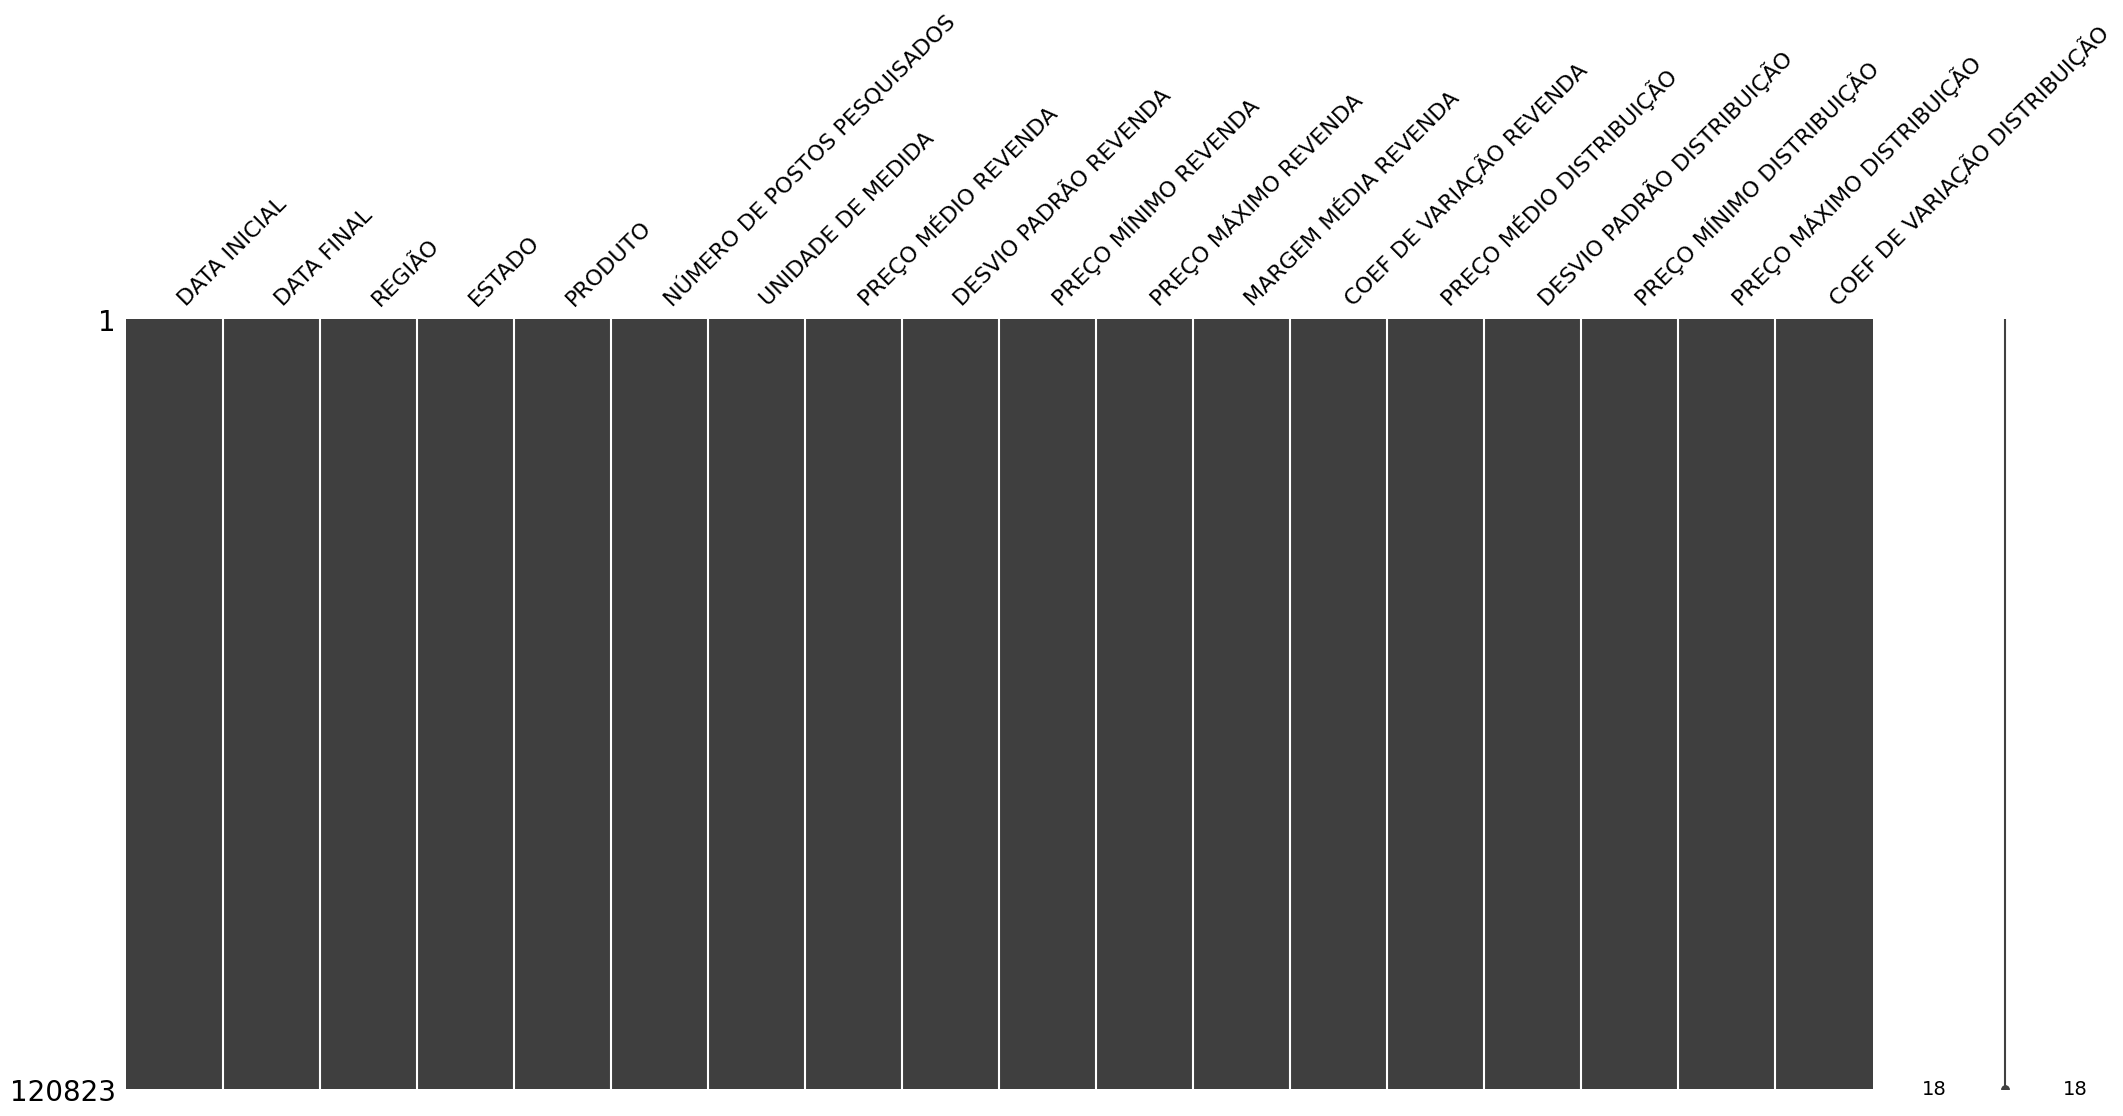

In [ ]:
msno.matrix(df)

## Abaixo, é mostrado um Mapa de Calor usando o Método de Correlação de **Spearman**, que no caso é o mais apropriado, tendo em vista que a distribuição dos dados não é normal.

## Podemos observar que:

1.   'NUMERO DE POSTOS PESQUISADOS' tem uma correlação baixa com os demais atributos.
2.   O 'COEFICIENTE DE VARIAÇÃO DISTRIBUIÇÃO' tem uma correlação baixa com todos os atributos, exceto com 'DESVIO PADRÃO DISTRIBUIÇÃO', o que é esperado, uma vez que coeficiente de variação é inversamente proporcional ao desvio padrão;
3.   O 'COEFICIENTE DE VARIAÇÃO REVENDA' tem uma correlação baixa com todos os atributos, exceto com 'DESVIO PADRÃO REVENDA', o que é esperado, uma vez que coeficiente de variação é inversamente proporcional ao desvio padrão;
4. 'MARGEM MÉDIA REVENDA' tem uma correlação moderada ou fraca com os demais atributos;
5. Os demais atribuitos referentes a REVENDA ou DISTRIBUIÇÃO tem altíssima correlação entre si.



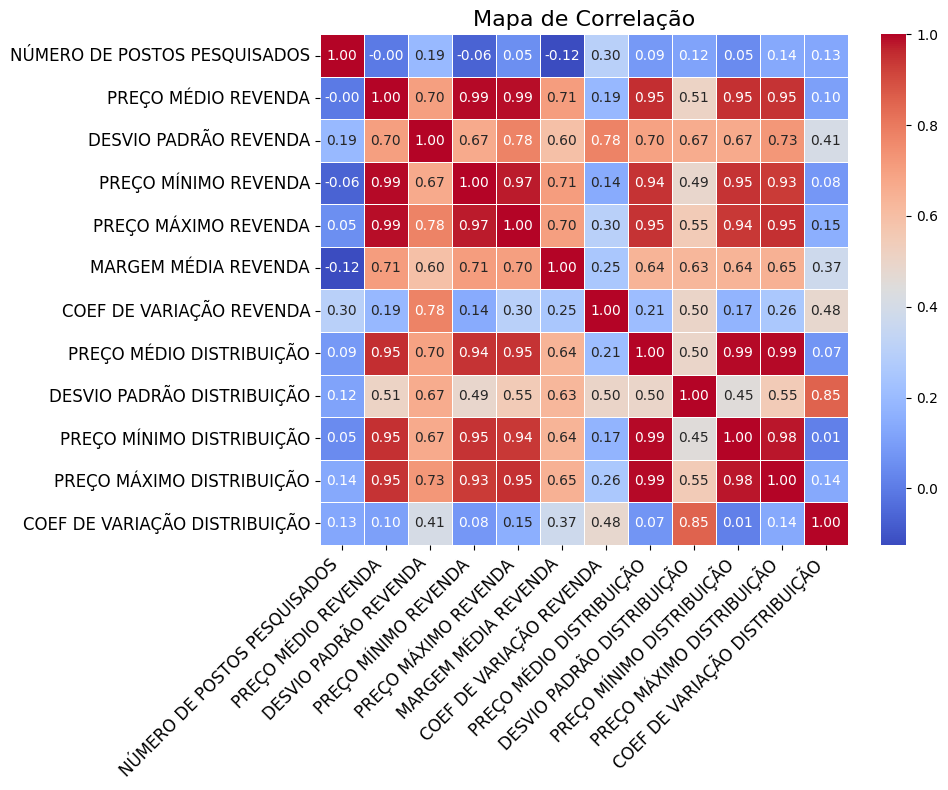

In [ ]:
# Create a correlation matrix (replace this with your own data)
corr_matrix = df.corr(method = 'spearman')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with Seaborn
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Customize plot aesthetics
plt.title('Mapa de Correlação', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

# Aqui será mostrada a parte referente a **Engenharia de Atributos**

- A primeira parte é referente à criação de atributos *Temporais*;
- a segunda parte é referente à criação de features de *Variação Relativa*

In [ ]:
# transformando as datas para os formatos convenientes
df['DATA INICIAL'] = pd.to_datetime(df['DATA INICIAL'])
df['DATA FINAL'] = pd.to_datetime(df['DATA FINAL'])

# capturando o ano, mês, dia e dia da semana
df['ANO INICIAL'] = df['DATA INICIAL'].dt.year
df['MES INICIAL'] = df['DATA INICIAL'].dt.month
df['DIA INICIAL'] = df['DATA INICIAL'].dt.day
df['DIA SEMANA INICIAL'] = df['DATA INICIAL'].dt.weekday

# agora calculando atributos em termos de Variações Relativas percentuais
df['DIFF REVENDA DIST'] = 100*(df['PREÇO MÉDIO REVENDA'] - df['PREÇO MÉDIO DISTRIBUIÇÃO'])/(df['PREÇO MÉDIO DISTRIBUIÇÃO'])
df['DIFF MÁXIMO REVENDA DIST'] = 100*(df['PREÇO MÁXIMO REVENDA'] - df['PREÇO MÁXIMO DISTRIBUIÇÃO'])/(df['PREÇO MÁXIMO DISTRIBUIÇÃO'])
df['DIFF MÍNIMO REVENDA DIST'] = 100*(df['PREÇO MÍNIMO REVENDA'] - df['PREÇO MÍNIMO DISTRIBUIÇÃO'])/(df['PREÇO MÍNIMO DISTRIBUIÇÃO'])
df['DIFF MÁXIMO MÍNIMO REVENDA'] = 100*(df['PREÇO MÁXIMO REVENDA'] - df['PREÇO MÍNIMO REVENDA'])/(df['PREÇO MÍNIMO REVENDA'])
df['DIFF MÁXIMO MÍNIMO DIST'] = 100*(df['PREÇO MÁXIMO DISTRIBUIÇÃO'] - df['PREÇO MÍNIMO DISTRIBUIÇÃO'])/(df['PREÇO MÍNIMO DISTRIBUIÇÃO'])

# Visualização de Dados

## Na figura abaixo, é mostrado o número de registros por Estado. Pode-se notar que Paraíba, Rio de Janeiro e Sâo Paulo têm o maior número de eventos, enquanto que Acre, Roraima e Amapá têm o menor número de eventos nesse conjunto de dados.

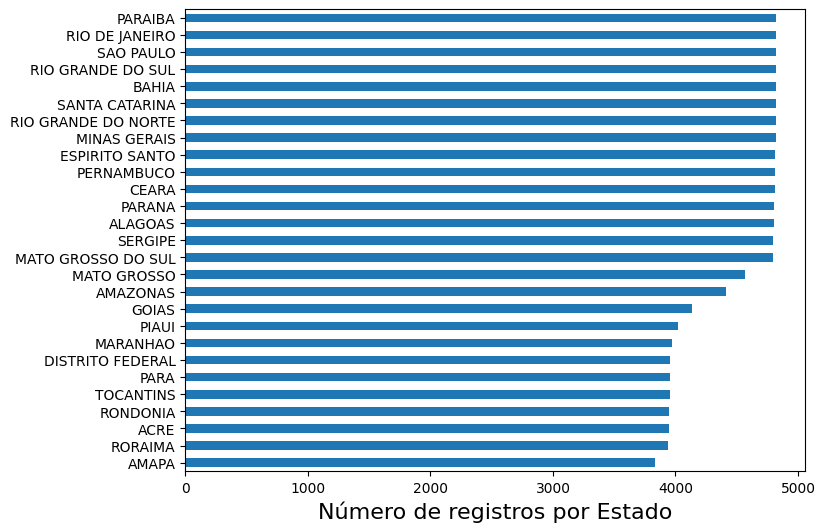

In [ ]:
plt.figure(figsize=[8,6])

df['ESTADO'].value_counts().sort_values().plot(kind='barh')

plt.xlabel('Número de registros por Estado',size=16)

plt.show()

## A Figura abaixo mostra o número de registros por Região. Nota-se que o Nordeste lidera, enquanto a região Sul tem o menor número de registros.

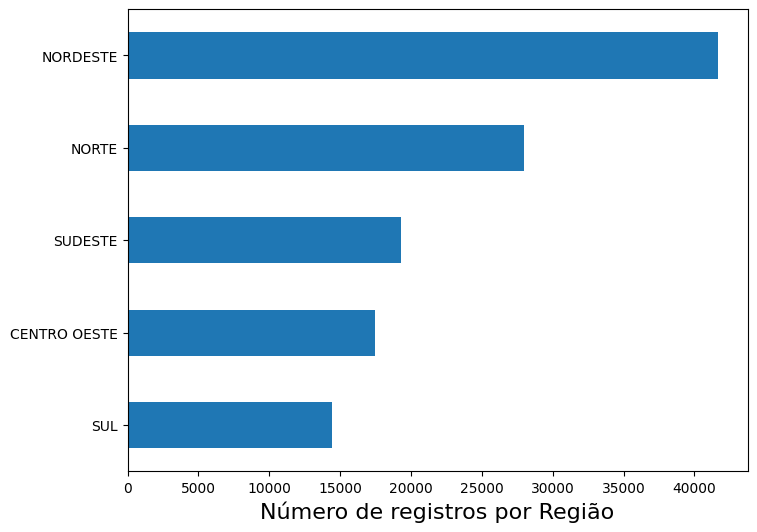

In [ ]:
plt.figure(figsize=[8,6])

df['REGIÃO'].value_counts().sort_values().plot(kind='barh')

plt.xlabel('Número de registros por Região',size=16)

plt.show()

## O gráfico abaixo mostra o número de registros por Unidade de Medida. Em primeiro está R\$/l, em seguida R$/13kg e R\$/m3.

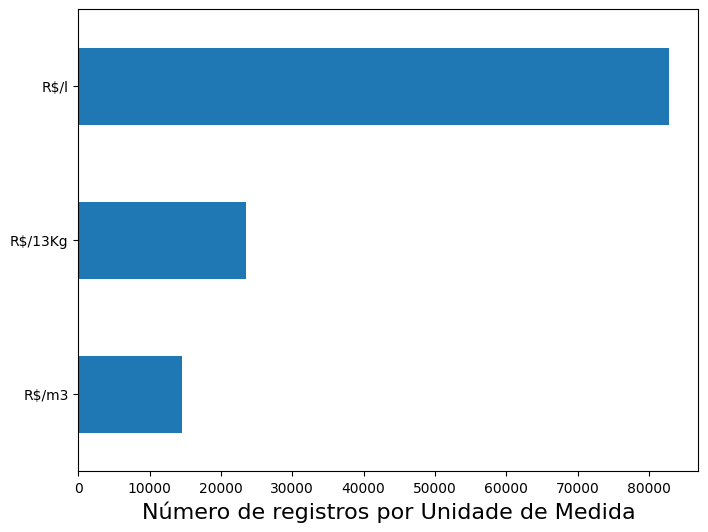

In [ ]:
plt.figure(figsize=[8,6])

df['UNIDADE DE MEDIDA'].value_counts().sort_values().plot(kind='barh')

plt.xlabel('Número de registros por Unidade de Medida',size=16)

plt.show()

## Nas análises a seguir, será removido o último ano de análise, pois os dados para esse ano estão muito incompletos.

In [ ]:
ano_max = df['ANO INICIAL'].max()
df = df[df['ANO INICIAL']!=ano_max]

## Função que cria GeoMapas.

In [ ]:
def geomapa_precos_grafico(df,cores_grafico,agrup1,agrup2,dim_date):
  """
  Essa função cria geomapas usando geopandas conforme os estados Brasileiros.
  """
  # zona do gráfico
  utm_zone_epsg = 32722

  numero_cols_rows = int(np.ceil(np.sqrt(len(df[agrup2].unique()))))

  # número de linhas e colunas no gráfico
  nrows, ncols = numero_cols_rows, numero_cols_rows

  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 14))
  plt.subplots_adjust(wspace=0.6, hspace=0.6)

# inicia o contador de colunas a ser varrido
  count_col = 0

  for col in range(ncols):

    for row in range(nrows):

        try:
          # fazendo a filtragem
          filter_col = list(df[agrup2].unique())[(ncols)*count_col+row]

          # fazendo os agrupamentos e selecionando a dimensão temporal
          df_ano_postos2 = df[df[agrup2]==filter_col].groupby([agrup1,agrup2,dim_date],as_index=False)[['PREÇO MÉDIO REVENDA','PREÇO MÉDIO DISTRIBUIÇÃO',
                                                                            'DIFF REVENDA DIST','NÚMERO DE POSTOS PESQUISADOS',
                                                                            'DIFF MÁXIMO REVENDA DIST','DIFF MÍNIMO REVENDA DIST',
                                                                            'DIFF MÁXIMO MÍNIMO REVENDA','DIFF MÁXIMO MÍNIMO DIST']].mean()

          # Load the GeoJSON file containing Brazilian states' geometries
          gdf = gpd.read_file("https://raw.githubusercontent.com/vzeizer/PUCRIO_Sprint1/master/brazil_geo.json")
          gdf = gdf.rename(columns={'name':agrup1})

          # Ensure the 'ESTADO' column in your data matches the state names in the GeoJSON
          gdf['ESTADO'] = gdf[agrup1].str.upper().apply(lambda x: unidecode(x))  # Ensure the names are in uppercase

          key_value_dict = {rows[agrup1]: rows[cores_grafico] for index, rows in df_ano_postos2.iterrows()}

          # Map agrup1 values to the 'ESTADO' column
          gdf['data_column'] = gdf[agrup1].map(key_value_dict)

          gdf = gdf.to_crs(epsg=utm_zone_epsg)  # Replace utm_zone_epsg with the appropriate EPSG code

          # Now calculate the centroid
          gdf['centroid'] = gdf['geometry'].centroid


          divider = make_axes_locatable(axes[row,col])
          cax = divider.append_axes("right", size="5%", pad=0.1)

          # Plot the map
          gdf.plot(column='data_column', cmap='coolwarm', linewidth=0.8, edgecolor='0.8',
                  ax=axes[row,col],cax=cax)

          # adiciona as abreviações para os estados
          for x, y, state in zip(gdf.centroid.x, gdf.centroid.y, gdf['ESTADO']):
              axes[row,col].text(x, y, state_abbreviations.get(state, state), fontsize=10, ha='center', va='center')

          # Add a colorbar
          sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=gdf['data_column'].min(),
                                                                        vmax=gdf['data_column'].max()))
          sm._A = []
          cbar = plt.colorbar(sm,ax=axes[row,col],cax=cax,label=cores_grafico)
          cbar.ax.tick_params(labelsize='large')

          # Set the title and show the plot
          axes[row,col].set_title('{0}: {1}'.format(agrup2,filter_col))
          axes[row,col].set_xlabel('Latitude',size=16)
          axes[row,col].set_ylabel('Longitude',size=16)

        except:

          axes[row,col].set_visible(False)

    # incrementa o contador de colunas
    count_col+=1

  plt.show()

## Agora, será mostrado um geomapa, criado com a biblioteca **GeoPandas**, em termos de escala de cores do Preço Médio de Distribuição para cada tipo de Unidade de Medida. Pode-se constatar o seguinte:

- R\$/l: Acre, Rondônia e Pará têm os maiores preços de distribuição. São Paulo e Paraná têm os menores;
- R\$/m3: O Maranhão se destoa dos demais estados como o com maior preço de distribuição. Estados como Paraná, Mato Grosso e Minas Gerais têm os menores;
- R\$/13kg: Roraima, Mato Grosso e Acre têm o maior preço de distribuição. Bahia, Sâo Paulo e Rio de Janeiro têm os menores.

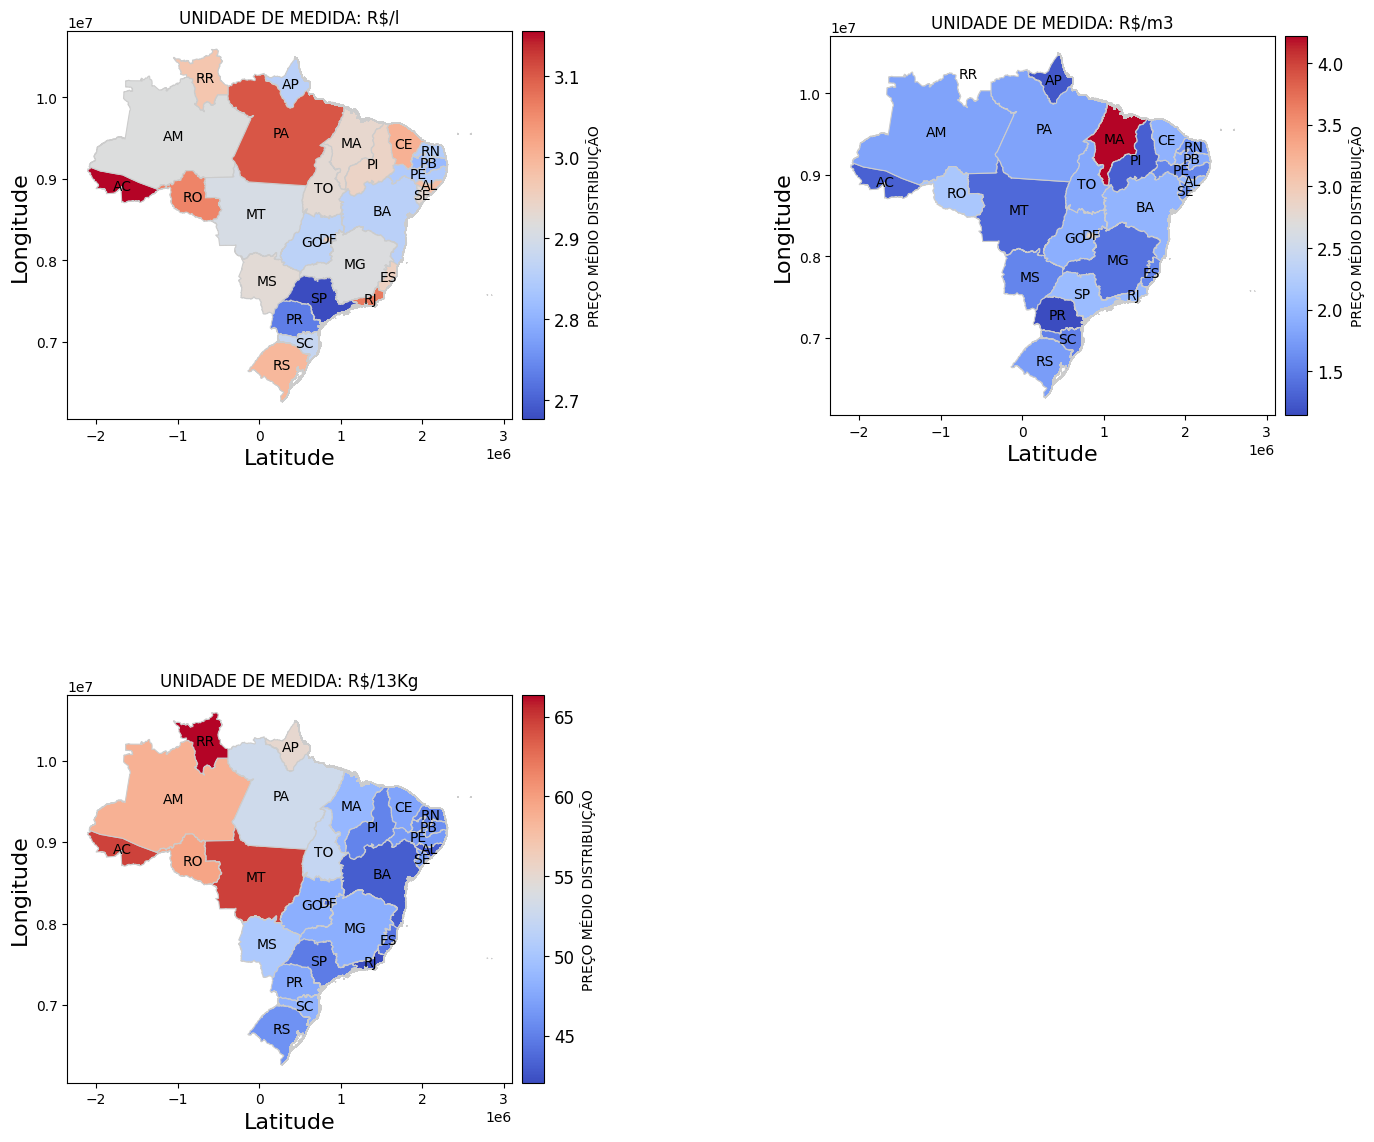

In [ ]:
cores_grafico = 'PREÇO MÉDIO DISTRIBUIÇÃO' # variável que representará as cores do colormap
agrup1 = 'ESTADO' # pode ser 'REGIÃO' também
agrup2 = 'UNIDADE DE MEDIDA' # como se fosse a matiz dos gráficos
dim_date = 'ANO INICIAL' # a Média temporalmente com Dimensões Anuais

geomapa_precos_grafico(df,cores_grafico,agrup1,agrup2,dim_date)


## Agora, será mostrado um geomapa, criado com a biblioteca GeoPandas, em termos de escala de cores do Preço Médio de Revenda para cada tipo de Unidade de Medida. Pode-se constatar o seguinte:

- R\$/l:  Acre se destoa com os maiores preços de revenda. Paraná e São Paulo têm os menores;
- R\$/m3:  Maranhão se destoa com os maiores preços de revenda. Acre e Goiás têm os menores;
- R\$/13kg: Mato Grosso se destoa com os maiores preços de revenda. Bahia e Pernambuco têm os menores.

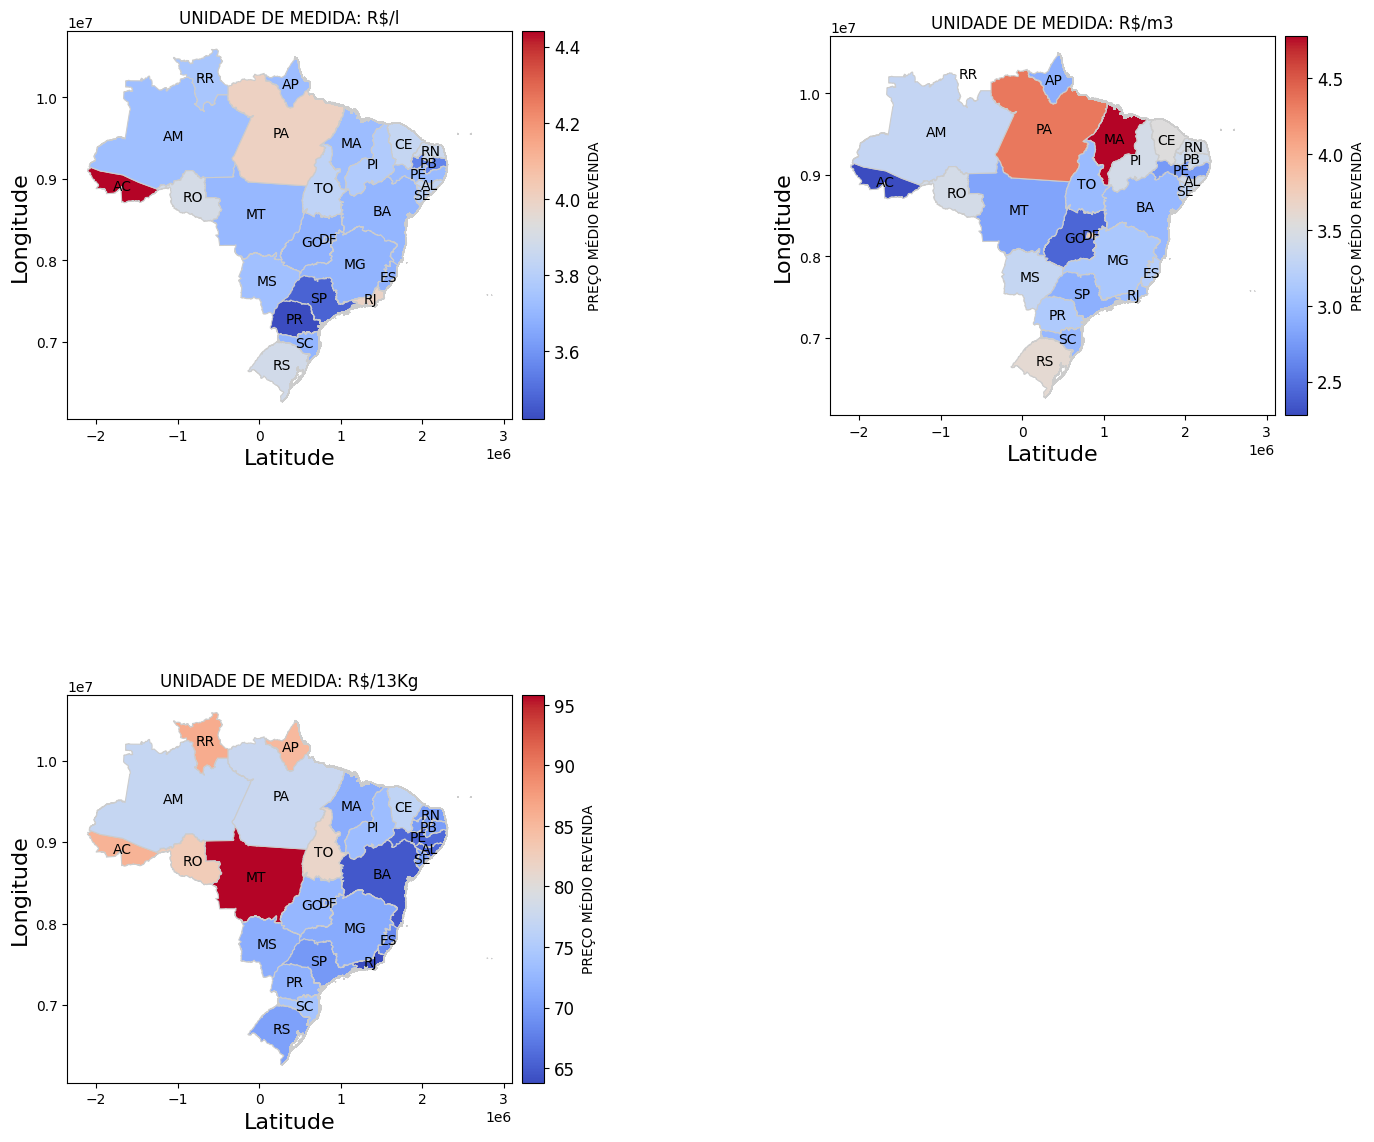

In [ ]:
cores_grafico = 'PREÇO MÉDIO REVENDA' # variável que representará as cores do colormap
agrup1 = 'ESTADO' # pode ser 'REGIÃO' também
agrup2 = 'UNIDADE DE MEDIDA' # como se fosse a matiz dos gráficos
dim_date = 'ANO INICIAL' # a Média temporalmente com Dimensões Anuais

geomapa_precos_grafico(df,cores_grafico,agrup1,agrup2,dim_date)


## Agora, será mostrado um geomapa, criado com a biblioteca GeoPandas, em termos de escala de cores do Preço Médio de Distribuição para cada tipo de Combustível (Produto). Pode-se constatar o seguinte:

- Etanol Hidratado:   maiores preços de distribuição.  têm os menores;
- GNV:   com os maiores preços de distribuição.  têm os menores;
- Gasolina:  com os maiores preços de distribuição.  têm os menores.
- Óleo:   com os maiores preços de distribuição.  têm os menores;
- Gasolina:  com os maiores preços de distribuição.  têm os menores.
- GLP



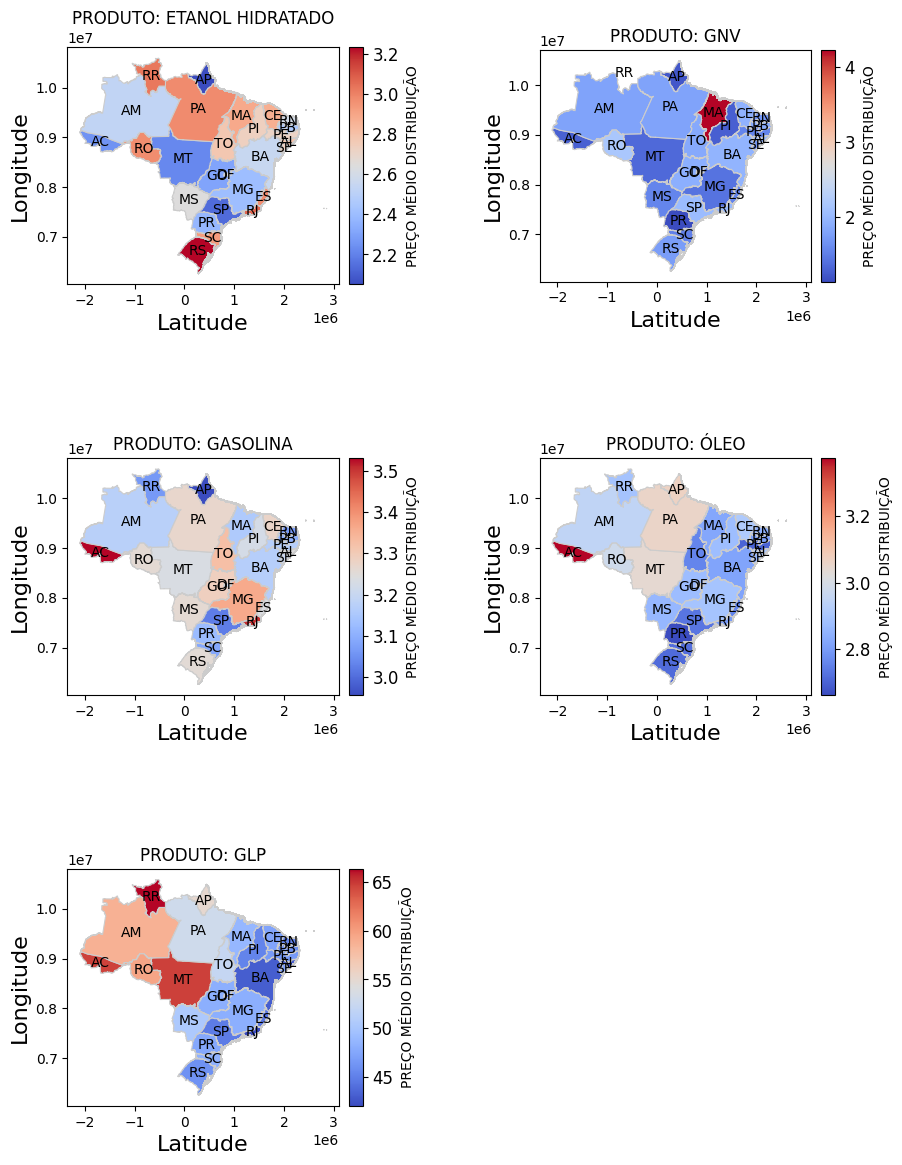

In [ ]:
cores_grafico = 'PREÇO MÉDIO DISTRIBUIÇÃO' # variável que representará as cores do colormap
agrup1 = 'ESTADO' # pode ser 'REGIÃO' também
agrup2 = 'PRODUTO' # como se fosse a matiz dos gráficos
dim_date = 'ANO INICIAL' # a Média temporalmente com Dimensões Anuais

geomapa_precos_grafico(df,cores_grafico,agrup1,agrup2,dim_date)


## Agora, será mostrado um geomapa, criado com a biblioteca GeoPandas, em termos de escala de cores do Preço Médio de Revenda para cada tipo de Combustível (Produto). Pode-se constatar o seguinte:

- Etanol Hidratado: Rio Grande do Sul, Acre e Pará têm os maiores preços de revenda. São Paulo, Mato Grosso e Paraná têm os menores;
- GNV: Maranhão e Pará têm os maiores preços de revenda. Acre e Goiás têm os menores;
- Gasolina: Acre se destoa com os maiores preços de revenda. Amapá se destoa com os menores.
- Óleo: Acre se destoa com os maiores preços de revenda. Paraná se destoa com os menores;
- GLP: Mato Grosso se destoa com os maiores preços de revenda. Bahia se destoa com os menores.


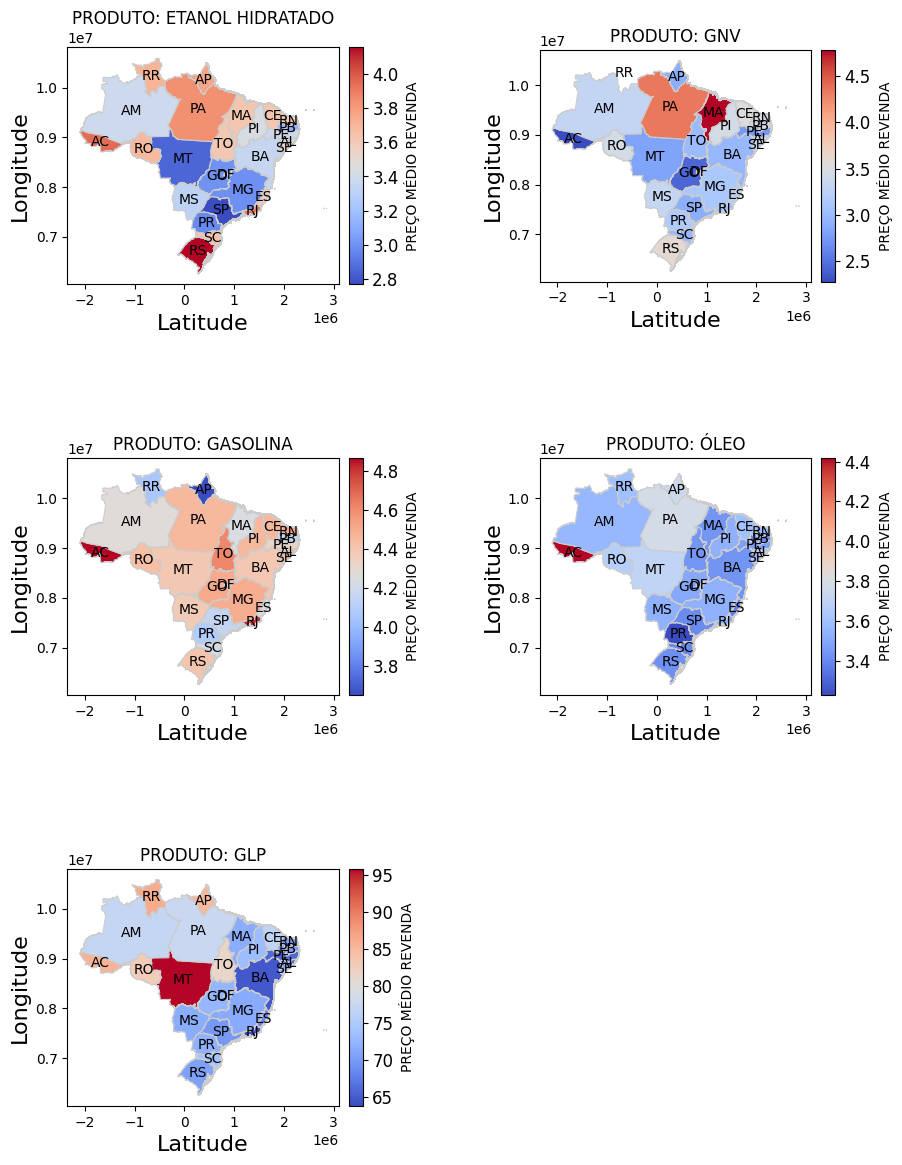

In [ ]:
cores_grafico = 'PREÇO MÉDIO REVENDA' # variável que representará as cores do colormap
agrup1 = 'ESTADO' # pode ser 'REGIÃO' também
agrup2 = 'PRODUTO' # como se fosse a matiz dos gráficos
dim_date = 'ANO INICIAL' # a Média temporalmente com Dimensões Anuais

geomapa_precos_grafico(df,cores_grafico,agrup1,agrup2,dim_date)


## Agora, será mostrado um geomapa, criado com a biblioteca GeoPandas, em termos de escala de cores do Preço Médio de Distribuição, no geral. Pode-se constatar o seguinte:

- Acre, Roraima, Rondônia e Amapá, no geral, têm os maiores Preços Médios de Distribuição, enquanto que Bahia, São Paulo, Rio de Janeiro e Espírito Santo têm os menores.

In [ ]:
def geomapa_precos_grafico_simples(df,agrup1,dim_date,cores_grafico):
  """
  Esas função cria mapas de uma maneira mais específica, de modo que não dependa
  de um determinado estado, mas sim uma média, no geral.
  """
  df_ano_postos = df.groupby([agrup1,dim_date],as_index=False)[['PREÇO MÉDIO REVENDA','PREÇO MÉDIO DISTRIBUIÇÃO',
                                                                      'DIFF REVENDA DIST','NÚMERO DE POSTOS PESQUISADOS',
                                                                      'DIFF MÁXIMO REVENDA DIST','DIFF MÍNIMO REVENDA DIST',
                                                                      'DIFF MÁXIMO MÍNIMO REVENDA','DIFF MÁXIMO MÍNIMO DIST']].mean()

  # Load the GeoJSON file containing Brazilian states' geometries
  gdf = gpd.read_file("https://raw.githubusercontent.com/vzeizer/PUCRIO_Sprint1/master/brazil_geo.json")

  # Set up the figure and axis
  fig, ax = plt.subplots(1, 1, figsize=(12, 8))

  gdf = gdf.rename(columns={'name':agrup1})

  # Ensure the 'ESTADO' column in your data matches the state names in the GeoJSON
  gdf[agrup1] = gdf[agrup1].str.upper().apply(lambda x: unidecode(x))  # Ensure the names are in uppercase

  key_value_dict = {row[agrup1]: row[cores_grafico] for index, row in df_ano_postos.iterrows()}

  # Map 'REVENDA' values to the 'ESTADO' column
  gdf['data_column'] = gdf[agrup1].map(key_value_dict)

  # Plot the map
  gdf.plot(column='data_column', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')
  for x, y, state in zip(gdf.centroid.x, gdf.centroid.y, gdf[agrup1]):
      ax.text(x, y, state_abbreviations.get(state, state), fontsize=10, ha='center', va='center')

  # Add a colorbar
  sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=gdf['data_column'].min(),
                             vmax=gdf['data_column'].max()))
  sm._A = []

  # colocando uma escala de cores
  cbar = plt.colorbar(sm,label=cores_grafico)
  cbar.ax.tick_params(labelsize='large')

  # Set the title and show the plot
  ax.set_title('Estados Brasileiros com Mapa em Escala de Cores')
  ax.set_xlabel('Latitude',size=16)
  ax.set_ylabel('Longitude',size=16)

  plt.show()

## Agora, será mostrado um geomapa, criado com a biblioteca GeoPandas, mostrando em termos de cores o Preço Médio de Distribuição, no geral. Pode-se constatar o seguinte:

-  Roraima, Acre, Rondônia e Amapá, no geral, têm os maiores Preços Médios de Distribuição, enquanto que Bahia, São Paulo, Rio de Janeiro e Espírito Santo têm os menores.

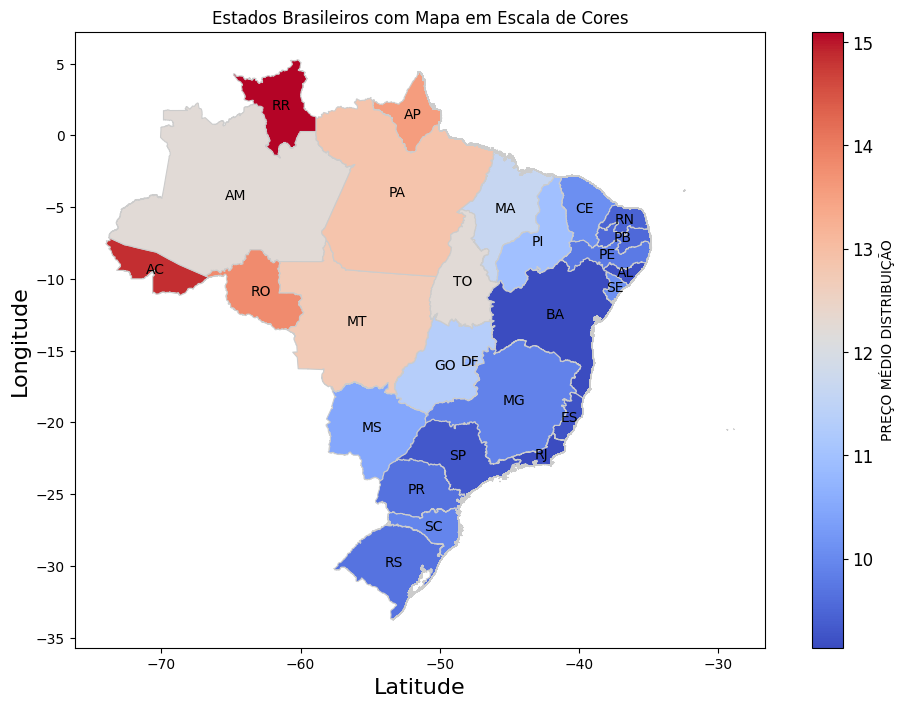

In [ ]:
agrup1 = 'ESTADO' # pode ser 'REGIÃO' também
dim_date = 'ANO INICIAL' # a Média temporalmente com Dimensões Anuais
cores_grafico = 'PREÇO MÉDIO DISTRIBUIÇÃO' # variável que representará as cores do colormap
geomapa_precos_grafico_simples(df,agrup1,dim_date,cores_grafico)

## Agora, será mostrado um geomapa, criado com a biblioteca GeoPandas, mostrando em termos de cores o Preço Médio de Revenda, no geral. Pode-se constatar o seguinte:

- Amapá, Acre, Roraima e Rondônia, no geral, têm os maiores Preços Médios de Revenda, enquanto que Bahia, Rio de Janeiro, Pernambuco e Alagoas têm os menores.

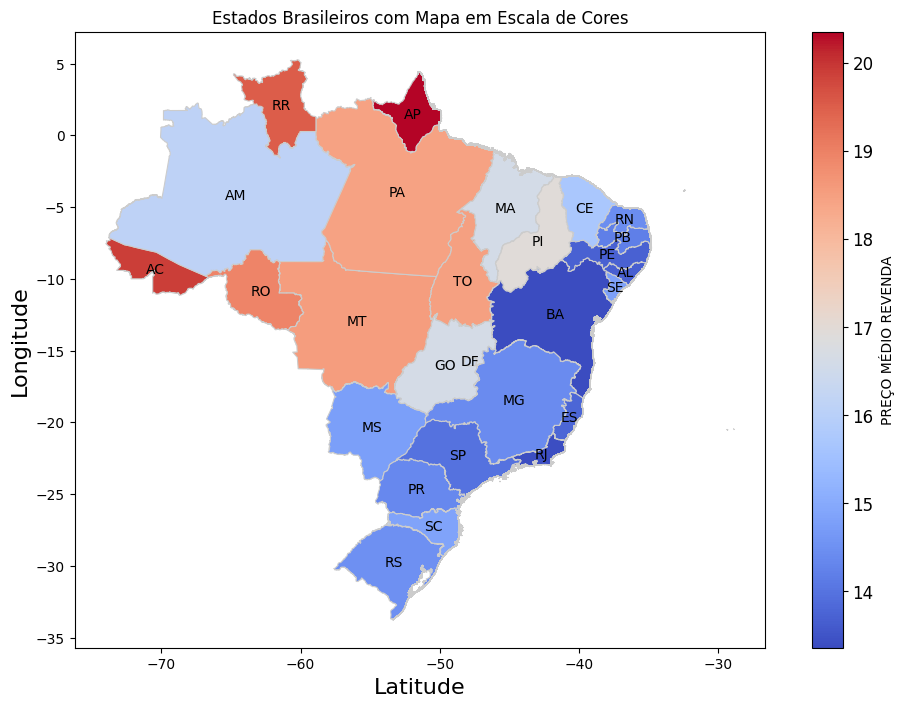

In [ ]:
agrup1 = 'ESTADO'
dim_date = 'ANO INICIAL'
cores_grafico = 'PREÇO MÉDIO REVENDA'
geomapa_precos_grafico_simples(df,agrup1,dim_date,cores_grafico)

Abaixo, é mostrado a Média anual do Número de Postos pesquisados por Produto para cada tipo de Combustível (Produto). Nota-se que a Gasolina foi o produto que teve maior número de postos pesquisados em todos os anos, enquanto o GNV o menor número em todos os anos.

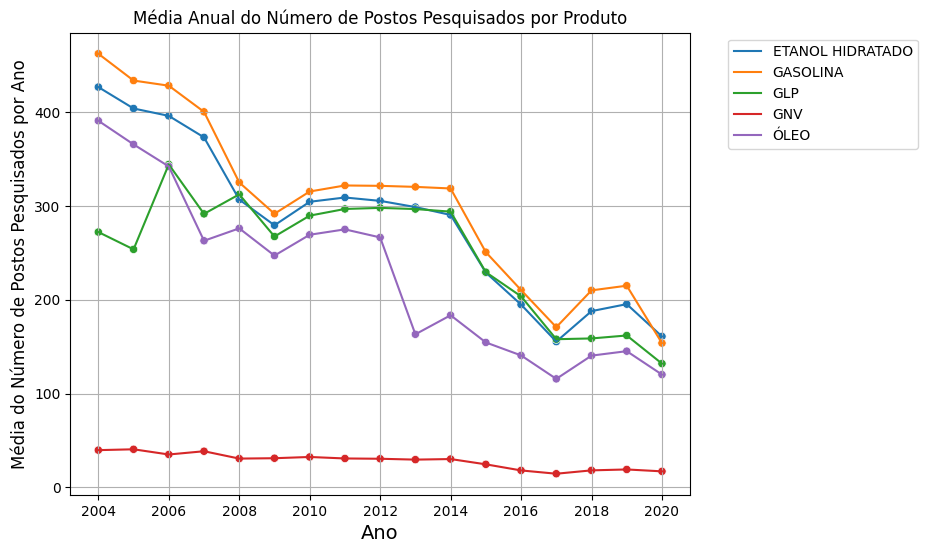

In [ ]:
# coluna que entrará na Matiz
agrup1 = 'PRODUTO'
# dimensão temporal a ser plotada
dim_date = 'ANO INICIAL'

# agrupando pelos atributos acima, selecionando algumas colunas e tomando a média.
df_ano_postos = df.groupby([agrup1,dim_date],as_index=False)[['PREÇO MÉDIO REVENDA','PREÇO MÉDIO DISTRIBUIÇÃO',
                                                                     'DIFF REVENDA DIST','NÚMERO DE POSTOS PESQUISADOS',
                                                                     'DIFF MÁXIMO REVENDA DIST','DIFF MÍNIMO REVENDA DIST',
                                                                     'DIFF MÁXIMO MÍNIMO REVENDA','DIFF MÁXIMO MÍNIMO DIST']].mean()
# Fazendo uma figura da Média Anual do Número de Postos Pesquisados por Produto
plt.figure(figsize=[8,6])

plt.title('Média Anual do Número de Postos Pesquisados por Produto')

sns.lineplot(data=df_ano_postos,hue=agrup1,y='NÚMERO DE POSTOS PESQUISADOS',x=dim_date)
sns.scatterplot(data=df_ano_postos,hue=agrup1,y='NÚMERO DE POSTOS PESQUISADOS',x=dim_date,markers='x',legend=None)

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Ano',size=14)
plt.ylabel('Média do Número de Postos Pesquisados por Ano',size=12)

plt.show()

Abaixo, é mostrada a média, por ano, do preço médio de revenda por combustível (Produto). Pode-se notar que os maiores preços é para GLP e os menores preços para GNV.

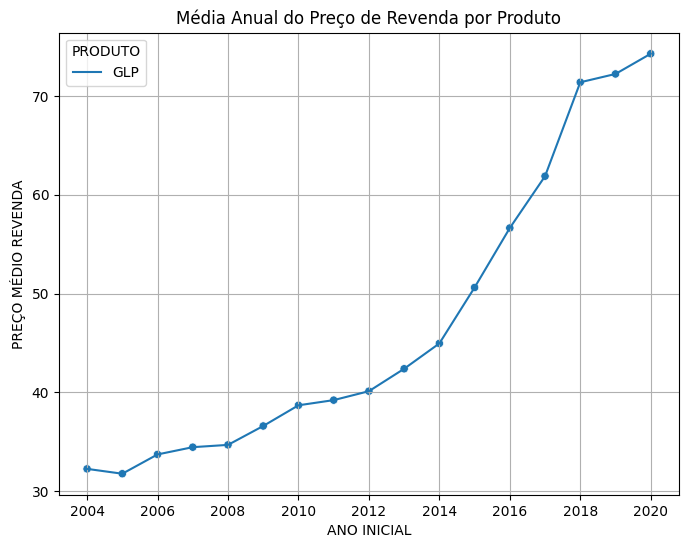

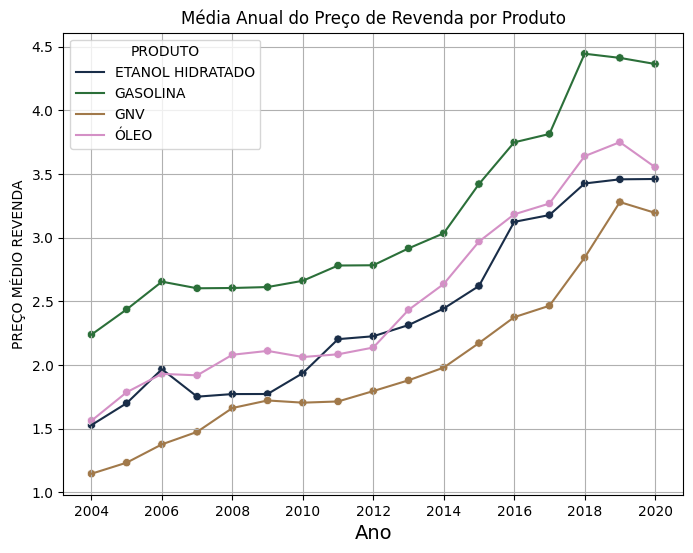

In [ ]:
# número de cores a ser usado na palleta
num_colors = 5
# definição da paletta customizada
custom_palette = sns.color_palette("cubehelix", n_colors=num_colors)

## Abaixo será feito um gráfico da Média Anual do Preço de Revenda por Produto (Combustível)
## GLP foi graficado separadamente dos demais por estar em uma escala diferente dos demais atributos.
plt.figure(figsize=[8,6])

plt.title('Média Anual do Preço de Revenda por Produto')
plt.grid(True)

df_glp = df_ano_postos[df_ano_postos['PRODUTO']=='GLP']
df_notglp = df_ano_postos[df_ano_postos['PRODUTO']!='GLP']

sns.lineplot(data=df_glp,hue=agrup1,y='PREÇO MÉDIO REVENDA',x=dim_date)
sns.scatterplot(data=df_glp,hue=agrup1,y='PREÇO MÉDIO REVENDA',x=dim_date,markers='x',legend=None)

plt.show()

plt.figure(figsize=[8,6])

sns.lineplot(data=df_notglp,hue=agrup1,y='PREÇO MÉDIO REVENDA',x=dim_date,palette=custom_palette)
sns.scatterplot(data=df_notglp,hue=agrup1,y='PREÇO MÉDIO REVENDA',x=dim_date,markers='x',legend=None,palette=custom_palette)

plt.title('Média Anual do Preço de Revenda por Produto')
plt.grid(True)
plt.xlabel('Ano',size=14)

plt.show()

## Abaixo, é mostrada a média, por ano, do preço médio de distribuição por combustível (Produto). Pode-se notar que os maiores preços é para GLP e os menores preços para GNV.

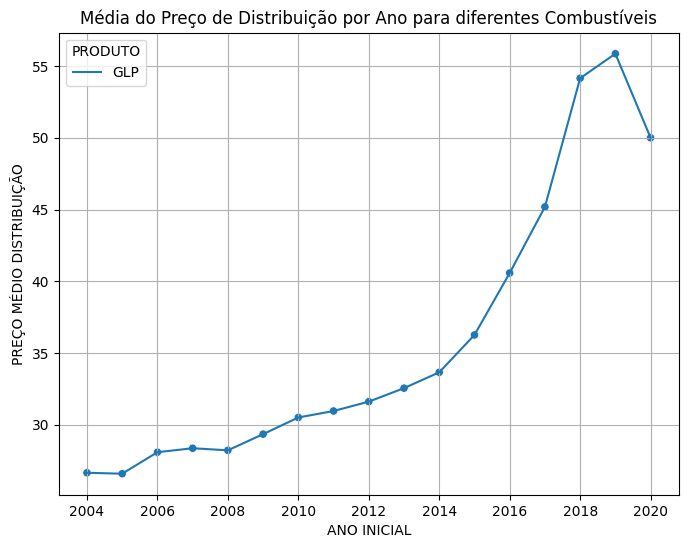

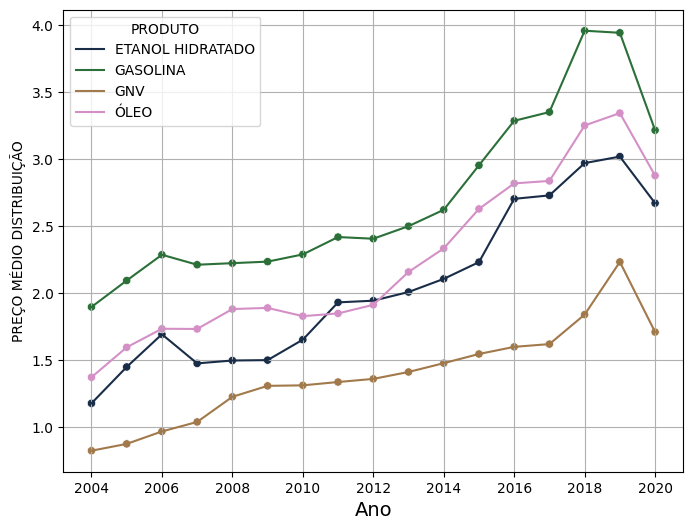

In [ ]:
# número de cores a ser usado na palleta
num_colors = 5
# definição da paletta customizada
custom_palette = sns.color_palette("cubehelix", n_colors=num_colors)

## Abaixo será feito um gráfico da Média Anual do Preço de Distribuição por Produto (Combustível)
## GLP foi graficado separadamente dos demais por estar em uma escala diferente dos demais atributos.

plt.figure(figsize=[8,6])

plt.title('Média do Preço de Distribuição por Ano para diferentes Combustíveis')
plt.grid(True)

df_glp = df_ano_postos[df_ano_postos['PRODUTO']=='GLP']
df_notglp = df_ano_postos[df_ano_postos['PRODUTO']!='GLP']

sns.lineplot(data=df_glp,hue=agrup1,y='PREÇO MÉDIO DISTRIBUIÇÃO',x=dim_date)
sns.scatterplot(data=df_glp,hue=agrup1,y='PREÇO MÉDIO DISTRIBUIÇÃO',x=dim_date,markers='x',
                legend=None)

plt.show()

plt.figure(figsize=[8,6])

sns.lineplot(data=df_notglp,hue=agrup1,y='PREÇO MÉDIO DISTRIBUIÇÃO',x=dim_date,palette=custom_palette)
sns.scatterplot(data=df_notglp,hue=agrup1,y='PREÇO MÉDIO DISTRIBUIÇÃO',x=dim_date,markers='x',
                legend=None,palette=custom_palette)

plt.grid(True)
plt.xlabel('Ano',size=14)

plt.show()

## Abaixo, é mostrada a média, por ano, a diferença percentual entre o preço médio de revenda e distribuição por combustível (Produto). Pode-se notar que os maiores ganhos são para GLP e GNV, enquanto que os menores são para Óleo.



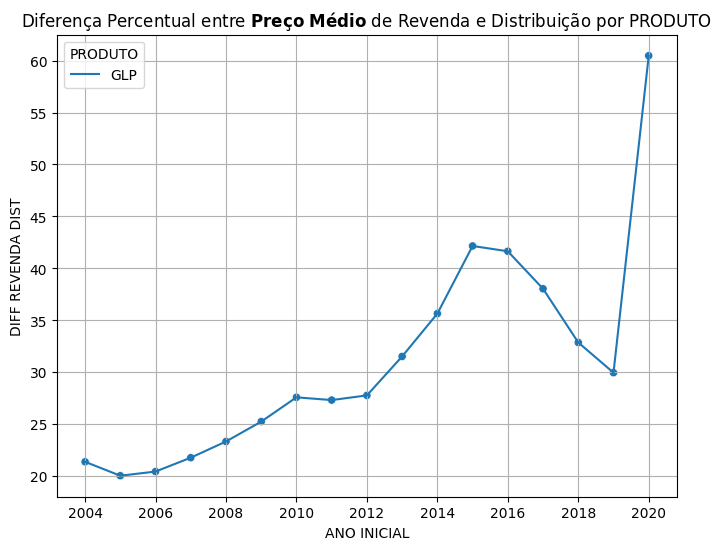

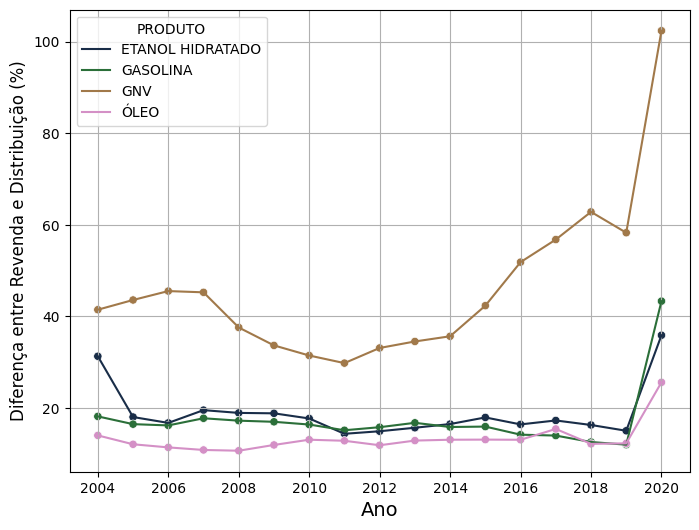

In [ ]:
## Abaixo será feito um gráfico da Diferença Percentual entre Preço Médio de Revenda e Distribuição por Produto (Combustível)
## GLP foi graficado separadamente dos demais por estar em uma escala diferente dos demais atributos.

plt.figure(figsize=[8,6])

plt.title(r'Diferença Percentual entre $\bf{Preço\ Médio}$ de Revenda e Distribuição por PRODUTO')
plt.grid(True)

df_glp = df_ano_postos[df_ano_postos['PRODUTO']=='GLP']
df_notglp = df_ano_postos[df_ano_postos['PRODUTO']!='GLP']

sns.lineplot(data=df_glp,hue=agrup1,y='DIFF REVENDA DIST',x=dim_date)
sns.scatterplot(data=df_glp,hue=agrup1,y='DIFF REVENDA DIST',x=dim_date,markers='x',legend=None)

plt.show()

plt.figure(figsize=[8,6])

sns.lineplot(data=df_notglp,hue=agrup1,y='DIFF REVENDA DIST',x=dim_date,palette=custom_palette)
sns.scatterplot(data=df_notglp,hue=agrup1,y='DIFF REVENDA DIST',x=dim_date,markers='x',legend=None,palette=custom_palette)


plt.grid(True)

plt.xlabel('Ano',size=14)
plt.ylabel('Diferença entre Revenda e Distribuição (%)',size=12)

plt.show()

## Abaixo, é mostrada a média, por ano, a diferença percentual entre o preço máximo de revenda e distribuição por combustível (Produto). Pode-se notar que os maiores ganhos são para GNV e GLP, enquanto que os menores são para Óleo.

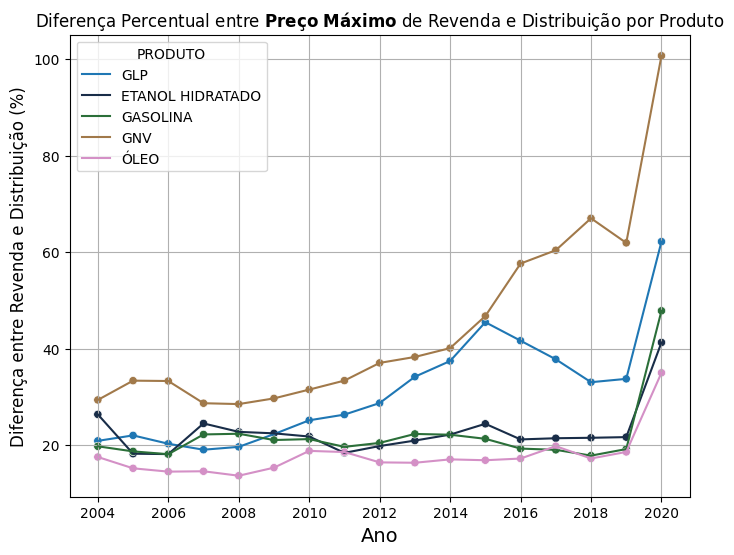

In [ ]:
## Abaixo será feito um gráfico da Diferença Percentual entre Preço Máximo de Revenda e Distribuição por Produto (Combustível)
## GLP foi graficado separadamente dos demais por estar em uma escala diferente dos demais atributos.

plt.figure(figsize=[8,6])

plt.title(r'Diferença Percentual entre $\bf{Preço\ Máximo}$ de Revenda e Distribuição por Produto')

df_glp = df_ano_postos[df_ano_postos['PRODUTO']=='GLP']
df_notglp = df_ano_postos[df_ano_postos['PRODUTO']!='GLP']

sns.lineplot(data=df_glp,hue=agrup1,y='DIFF MÁXIMO REVENDA DIST',x=dim_date)
sns.scatterplot(data=df_glp,hue=agrup1,y='DIFF MÁXIMO REVENDA DIST',x=dim_date,
                markers='x',legend=None)

sns.lineplot(data=df_notglp,hue=agrup1,y='DIFF MÁXIMO REVENDA DIST',x=dim_date,palette=custom_palette)
sns.scatterplot(data=df_notglp,hue=agrup1,y='DIFF MÁXIMO REVENDA DIST',x=dim_date,
                markers='x',legend=None,palette=custom_palette)


plt.grid(True)
plt.xlabel('Ano',size=14)
plt.ylabel('Diferença entre Revenda e Distribuição (%)',size=12)

plt.show()

## Abaixo, é mostrada a média, por ano, a diferença percentual entre o preço mínimo de revenda e distribuição por combustível (Produto). Pode-se notar que os maiores ganhos são para GNV e GLP, enquanto que os menores são para Óleo.

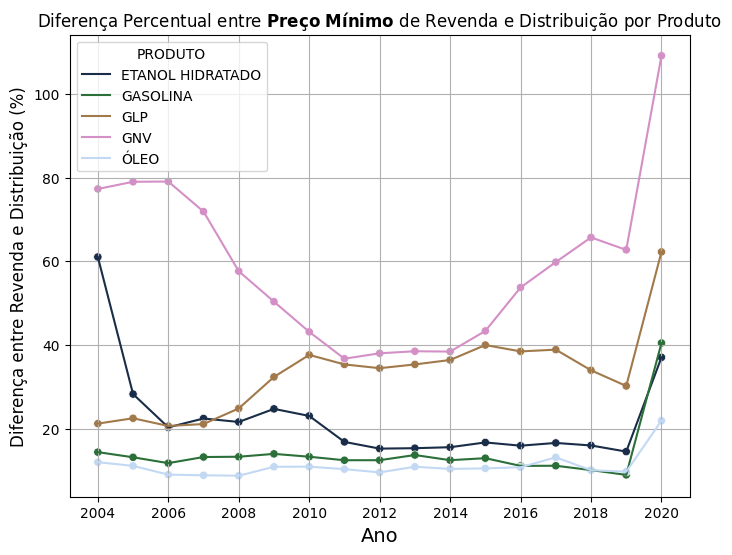

In [ ]:
## Abaixo será feito um gráfico da Diferença Percentual entre Preço Mínimo de Revenda e Distribuição por Produto (Combustível)
## GLP foi graficado separadamente dos demais por estar em uma escala diferente dos demais atributos.

plt.figure(figsize=[8,6])

plt.title(r'Diferença Percentual entre $\bf{Preço\ Mínimo}$ de Revenda e Distribuição por Produto')

sns.lineplot(data=df_ano_postos,hue=agrup1,y='DIFF MÍNIMO REVENDA DIST',x=dim_date,palette=custom_palette)
sns.scatterplot(data=df_ano_postos,hue=agrup1,y='DIFF MÍNIMO REVENDA DIST',x=dim_date,markers='x',legend=None,palette=custom_palette)

plt.grid(True)
plt.xlabel('Ano',size=14)
plt.ylabel('Diferença entre Revenda e Distribuição (%)',size=12)

plt.show()

In [ ]:
# Uma maneira elegante de colocar as variáveis de interesse em um dicionário
idx=1
revenda_dist = ['REVENDA','DISTRIBUIÇÃO']
vars = ['PREÇO MÉDIO {0}', 'DESVIO PADRÃO {0}', 'PREÇO MÍNIMO {0}',
       'PREÇO MÁXIMO {0}', 'MARGEM MÉDIA {0}',
       'COEF DE VARIAÇÃO {0}']

# criando o dicionário para 'REVENDA' e 'DISTRIBUIÇÃO'
columns_to_fit = [item.replace('{0}', revenda_dist[idx]) for item in vars]
# adicionando a coluna 'DIFF REVENDA DIST'
columns_to_fit += ['DIFF REVENDA DIST']

## Função que cria scatterplots e gráficos de regressão polinomial

In [ ]:
def reg_poly_produto(df,agrup1,step,hue,y_label,x_date,fuel_glp,do_fit,order_fit,colors):
  """
  Essa função cria scatterplots e gráficos de reg. polinomial para um dataframe df
  para uma dada variável "y_label" com matiz (hue) como, por exemplo, 'PRODUTO' e
  'UNIDADE DE MEDIDA'
  """

  # fazendo o agrupamento inicial e obtendo a média
  df_ano = df.groupby([agrup1,'ANO INICIAL'], as_index=False).mean()
  # obtendo a coluna 'ANO INICIAL ZERO', que corresponde ao total de anos transcorridos
  df_ano['ANO INICIAL ZERO'] = df_ano['ANO INICIAL'] - df_ano['ANO INICIAL'].min()
  # colunas numéricas
  cols_numeric = list(df_ano.select_dtypes(include=['float64']).columns)
  # colunas não numéricas
  non_numeric_columns = list(df_ano.select_dtypes(exclude=['float64','int64']).columns)
  df_non_numeric = df_ano[non_numeric_columns]

  # listas auxiliares
  col_list=[]
  linear_list = []
  quad_list = []

  if(do_fit):

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

    # pegando os maiores valores para y_label para agrup1
    indx_max = df_ano[y_label].idxmax()
    fuel_glp = df_ano.iloc[indx_max][agrup1]

    # Fit a quadratic regression model
    x = df_ano[df_ano[hue]==fuel_glp][x_date]
    # calculando a variação de y_label com respeito ao ano mais velho
    y = df_ano[df_ano[hue]==fuel_glp][y_label]
    y = y - df_ano[(df_ano[hue]==fuel_glp).values & (df_ano[x_date]==df_ano[x_date].min()).values][y_label].iloc[0]
    y = y/df_ano[(df_ano[hue]==fuel_glp).values & (df_ano[x_date]==df_ano[x_date].min()).values][y_label].iloc[0]

    # efetuando e encontrando os coeficientes da regressão linear
    quadratic_coefficients = np.polyfit(x, y, order_fit)
    quadratic_model = np.poly1d(quadratic_coefficients)
    col_list.append(fuel_glp)

    # Generate x values for the regression line
    x_regression = np.linspace(min(x), max(x), 100)
    y_regression = quadratic_model(x_regression)

    # dando append nos coeficientes da regressão linear
    linear_list.append(quadratic_coefficients[1])
    quad_list.append(quadratic_coefficients[0])

    # Plot the regression line
    plt.plot(np.array(x_regression), y_regression,
            color='black',label='Reg. Linear')
    # Plota a Inflação
    plt.plot(np.arange(0,18), np.array(inflacao)/100,
            color='red',label='Inflação (%)')
    # Faz um gráfico de dispersão para o caso específico
    plt.scatter(x,y,label=fuel_glp)

    # adiciona 2004 aos eixos
    def format_ticks(value, pos):
      return f'{value + 2004:g}'  # Add the constant to the tick value
    plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

    # Add labels and a legend
    plt.xlabel("Ano", size=14)
    plt.grid(True)
    plt.xticks(np.arange(df_ano[x_date].min(),df_ano[x_date].max()+step,step))
    plt.title(y_label + " por Ano")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

  if(do_fit):

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

    # pegando o valor máximo de y_label
    indx_max = df_ano[y_label].idxmax()
    fuel_glp = df_ano.iloc[indx_max][agrup1]

    # iterando pelos valores únicos de 'hue' que são diferentes de 'fuel_glp'
    for i,col_prod in enumerate(list(df_ano[df_ano[hue]!=fuel_glp][hue].unique())):

      x = df_ano[df_ano[hue]==col_prod][x_date]
      y = df_ano[df_ano[hue]==col_prod][y_label]
      # calculando a variação relativa com respeito ao menor ano de y_label
      y = y - df_ano[(df_ano[hue]==col_prod).values & (df_ano[x_date]==df_ano[x_date].min()).values][y_label].iloc[0]
      y = y/df_ano[(df_ano[hue]==col_prod).values & (df_ano[x_date]==df_ano[x_date].min()).values][y_label].iloc[0]

      # fazendo o ajuste polinomial
      quadratic_coefficients = np.polyfit(x, y, order_fit)
      quadratic_model = np.poly1d(quadratic_coefficients)
      col_list.append(fuel_glp)

      # Generate x values for the regression line
      x_regression = np.linspace(min(x), max(x), 100)
      y_regression = quadratic_model(x_regression)

      # dando append no valor dos coeficientes da reg. polinomial
      linear_list.append(quadratic_coefficients[1])
      quad_list.append(quadratic_coefficients[0])

      # Plot the regression line
      plt.plot(np.array(x_regression), y_regression,
              color='black',label='Reg. Linear')
      # plotando a inflação acumulada
      plt.plot(np.arange(0,18), np.array(inflacao)/100,
              color='red',label='Inflação (%)')
      # adicionando 2004 ao x_ticks
      plt.scatter(x,y,label=col_prod)
      def format_ticks(value, pos):
        return f'{value + 2004:g}'  # Add the constant to the tick value
      plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

      # Add labels and a legend
      plt.xlabel("Ano", size=14)
      plt.grid(True)
      plt.xticks(np.arange(df_ano[x_date].min(),df_ano[x_date].max()+step,step))
      plt.title(y_label + " por Ano")
      plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

  if(do_fit):

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

    # índice do maior valor de y_label
    indx_max = df_ano[y_label].idxmax()
    fuel_glp = df_ano.iloc[indx_max][agrup1]
    col_list.append(fuel_glp)

    # Fit a quadratic regression model
    x = df_ano[df_ano[hue]==fuel_glp][x_date]
    y = df_ano[df_ano[hue]==fuel_glp][y_label]
    quadratic_coefficients = np.polyfit(x, y, order_fit)
    quadratic_model = np.poly1d(quadratic_coefficients)


    # Generate x values for the regression line
    x_regression = np.linspace(min(x), max(x), 100)
    y_regression = quadratic_model(x_regression)

    # dando append nos coeficientes da reg. polinomial
    linear_list.append(quadratic_coefficients[1])
    quad_list.append(quadratic_coefficients[0])

    # Plot the regression line
    plt.plot(x_regression, y_regression,
            color='black')
    color = ['blue','red','green','orange']

    # faz o scatter plot desejado
    sns.scatterplot(data=df_ano[df_ano[hue]==fuel_glp],x=x_date,y=y_label,
                  color=color,hue=hue)

    # formata o x_ticks para add 2004
    def format_ticks(value, pos):
      return f'{value + 2004:g}'  # Add the constant to the tick value
    plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

    plt.grid(True)
    # Add labels and a legend
    plt.xlabel("Ano", size=14)
    #plt.ylabel("Y-axis")
    plt.title(y_label + " por Ano")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

  if(do_fit):

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

    # pega o valor máximo de y_label
    indx_max = df_ano[y_label].idxmax()
    fuel_glp = df_ano.iloc[indx_max][agrup1]

    # itera sobre os valor de df_ano[hue] diferente de fuel_glp
    for i,col_prod in enumerate(list(df_ano[df_ano[hue]!=fuel_glp][hue].unique())):

      # filtra pelo elemento desejado
      x = df_ano[df_ano[hue]==col_prod][x_date]
      y = df_ano[df_ano[hue]==col_prod][y_label]
      # efetua a regressão polinomial
      quadratic_coefficients = np.polyfit(x, y, order_fit)
      col_list.append(col_prod)
      quadratic_model = np.poly1d(quadratic_coefficients)

      # add um grid
      plt.grid(True)

      # dando append nos coeficientes da reg. polinomial
      linear_list.append(quadratic_coefficients[1])
      quad_list.append(quadratic_coefficients[0])

      # Generate x values for the regression line
      x_regression = np.linspace(min(x), max(x), 100)
      y_regression = quadratic_model(x_regression)

      # Plot the regression line
      plt.plot(x_regression, y_regression, color='black',label='Quad. Reg: '+col_prod)
      def format_ticks(value, pos):
        return f'{value + 2004:g}'  # Add the constant to the tick value
      plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

      # Add labels and a legend
      plt.xlabel("Ano", size=14)
      plt.title(y_label + " por Ano")
    # faz um scatterplot de df_ano para o atributo hue diferente de 'fuel_glp'
    sns.scatterplot(data=df_ano[df_ano[hue]!=fuel_glp],x=x_date,y=y_label,
                  color=color,hue=hue,palette=colors)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(np.arange(df_ano[x_date].min(), df_ano[x_date].max()+step, step))


  plt.show()

## A partir do gráfico abaixo, podemos notar que a variação relativa do Preço Médio de Distribuição por Ano para diferentes unidades de medida fica abaixo da Inflação acumulada para a maioria dos anos para o produto "R$\$$/13kg", enquanto que para "R$\$ $/l" e"R$\$ $/m3" o Preço fica acima da Inflação acumulada. O Preço Médio de Distribuição por Ano por unidade de medida, nesse caso, tem aproximadamente um comportamento quadrático.

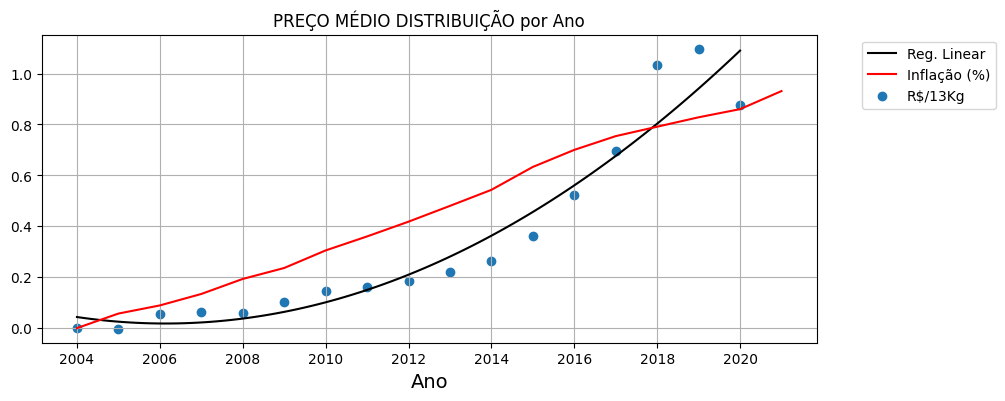

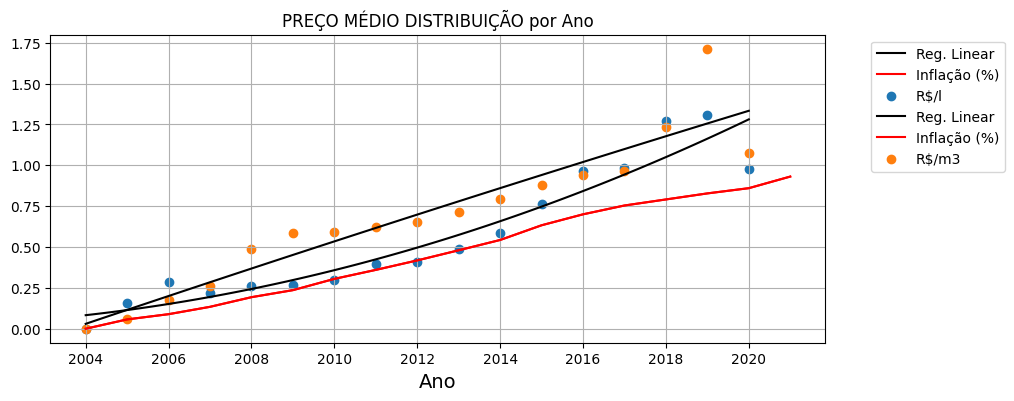

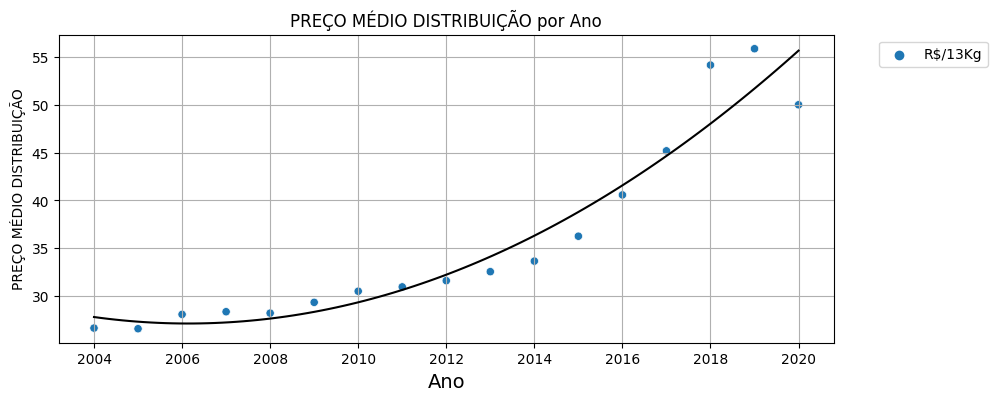

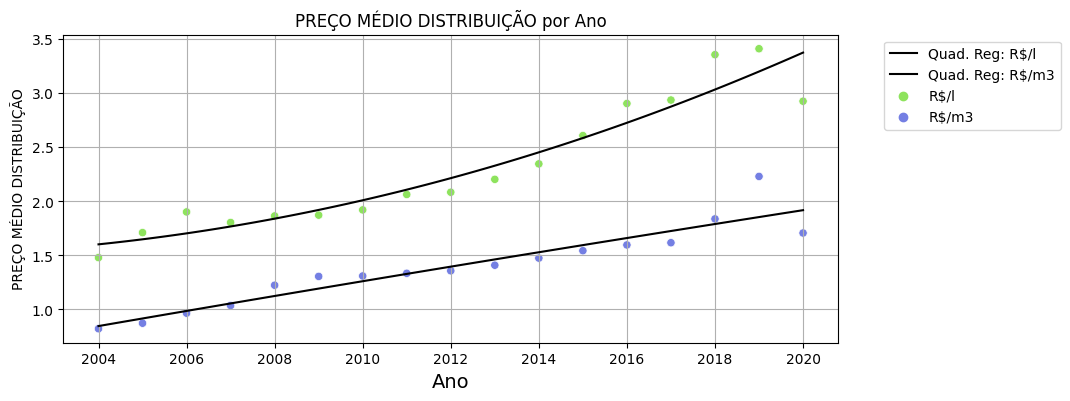

In [ ]:
agrup1 = 'UNIDADE DE MEDIDA'
step = 2
hue = agrup1
y_label = columns_to_fit[0]
x_date = 'ANO INICIAL ZERO'
indx_max = df[y_label].idxmax()
fuel_glp = df.iloc[indx_max][agrup1]
do_fit = True
order_fit = 2
colors = [ '#8EE35D','#747FE3', '#E37346']
reg_poly_produto(df,agrup1,step,hue,y_label,x_date,fuel_glp,do_fit,order_fit,colors)

## A partir do gráfico abaixo, podemos notar que a variação relativa da Diferença entre Revenda e Distribuição por Ano por unidade de medida fica abaixo da Inflação acumulada, no geral, exceto para "R\$/13kg" que excede em alguns anos. A Diferença entre Revenda e Distribuição por Ano por unidade de medida, nesse caso, tem aproximadamente um comportamento quadrático.

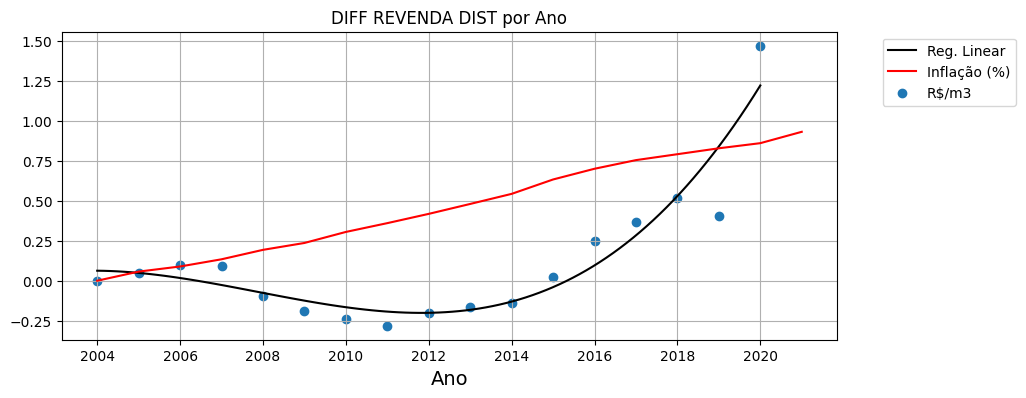

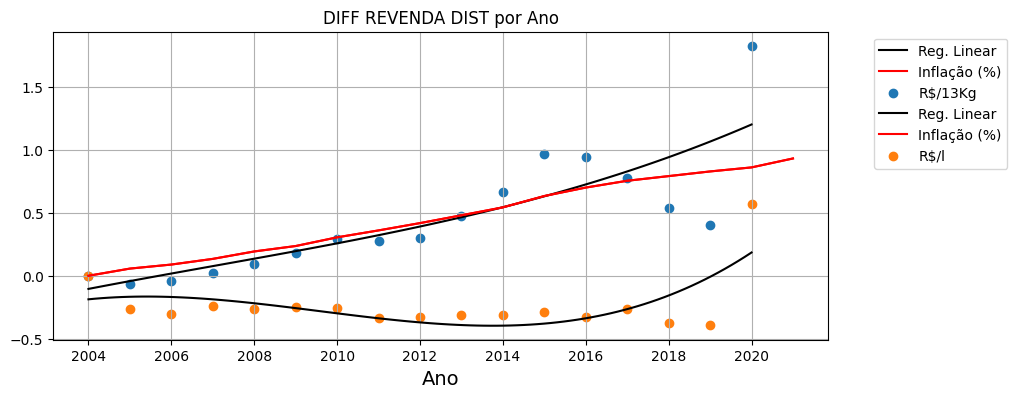

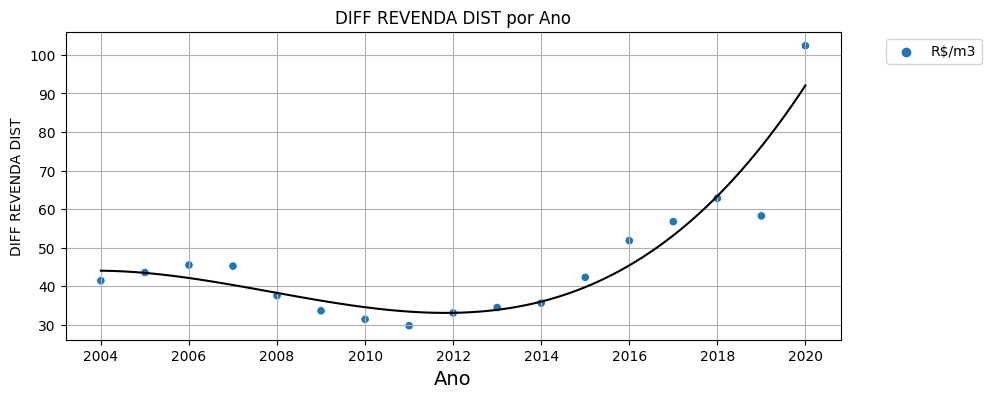

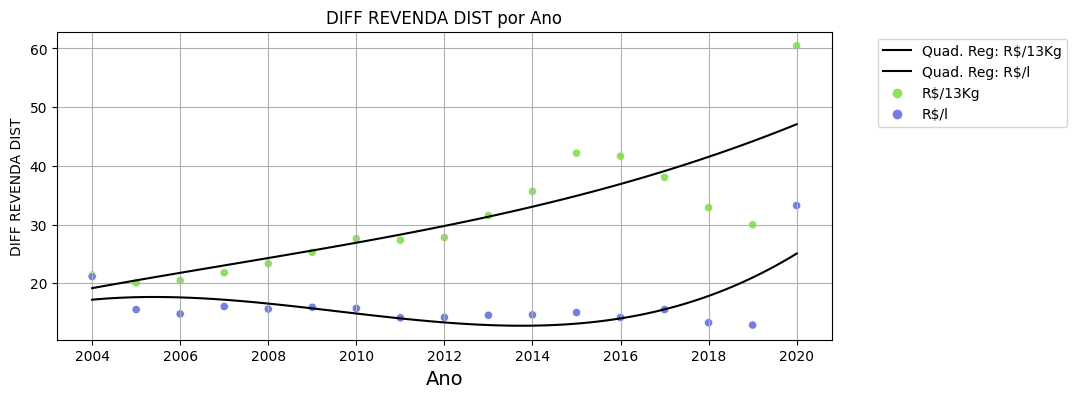

In [ ]:
agrup1 = 'UNIDADE DE MEDIDA'
step = 2
hue = agrup1
y_label = columns_to_fit[-1]
x_date = 'ANO INICIAL ZERO'
fuel_glp = df[[agrup1,y_label]].max().values[0]
do_fit = True
order_fit = 3
colors = [ '#8EE35D','#747FE3', '#E37346']
reg_poly_produto(df,agrup1,step,hue,y_label,x_date,fuel_glp,do_fit,order_fit,colors)

## A partir do gráfico abaixo, podemos notar que o Preço Médio de Distribuição por Ano para diferentes produtos fica acima da Inflação acumulada, no geral, exceto para "GLP", o qual fica abaixo em quase todos os anos e a Gasolina fica acima da Inflação acumulada apenas em poucos anos. O Preço Médio de Distribuição por Ano por produto, nesse caso, tem aproximadamente um comportamento quadrático.

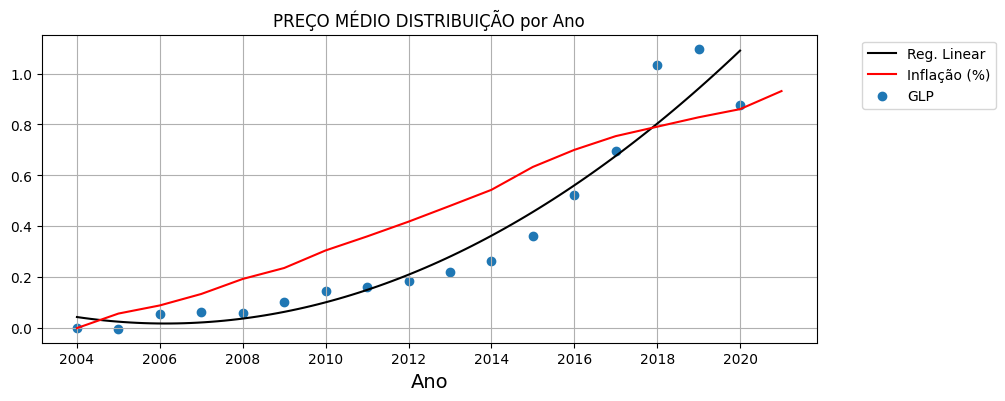

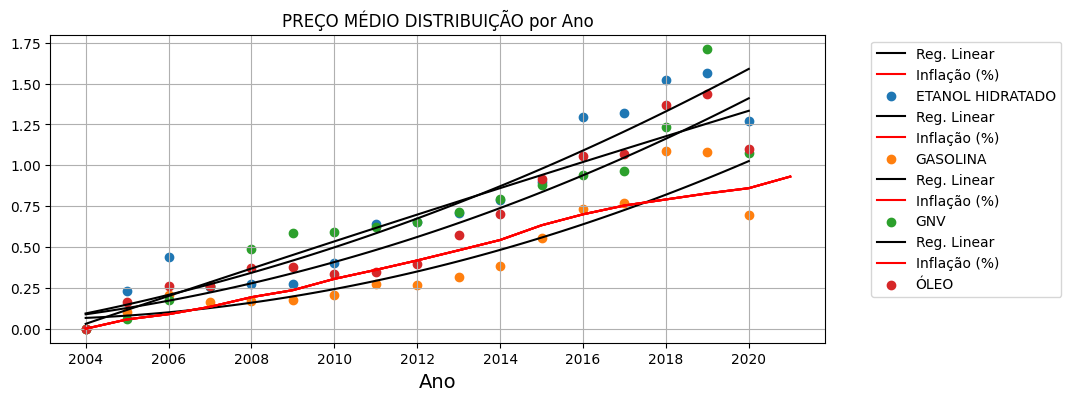

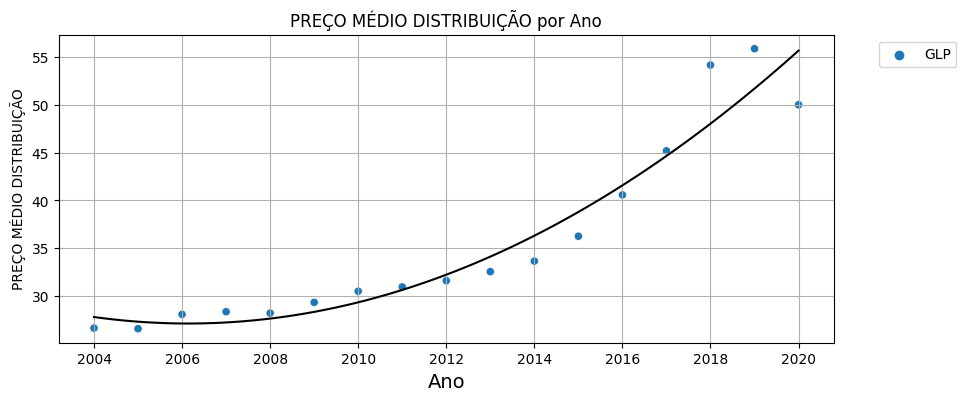

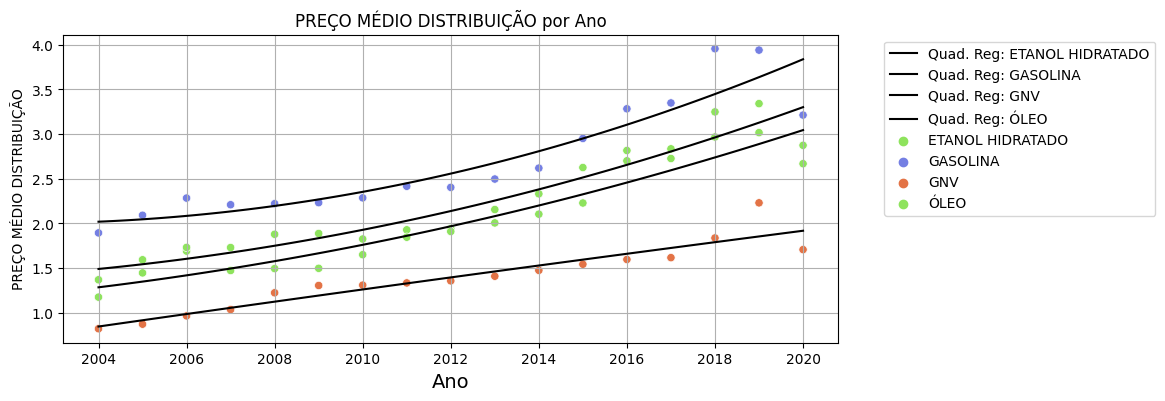

In [ ]:
agrup1 = 'PRODUTO'
step = 2
hue = agrup1
y_label = columns_to_fit[0]
x_date = 'ANO INICIAL ZERO'
fuel_glp = df[[agrup1,y_label]].max().values[0]
do_fit = True
order_fit = 2
colors = [ '#8EE35D','#747FE3', '#E37346']
reg_poly_produto(df,agrup1,step,hue,y_label,x_date,fuel_glp,do_fit,order_fit,colors)

## A partir do gráfico abaixo, podemos notar que a variação relativa da Diferença entre Revenda e Distribuição por Ano por produto fica abaixo da Inflação acumulada, no geral, exceto para poucos anos específicos. A Diferença entre Revenda e Distribuição por Ano por produto tem aproximadamente um comportamento cúbico.

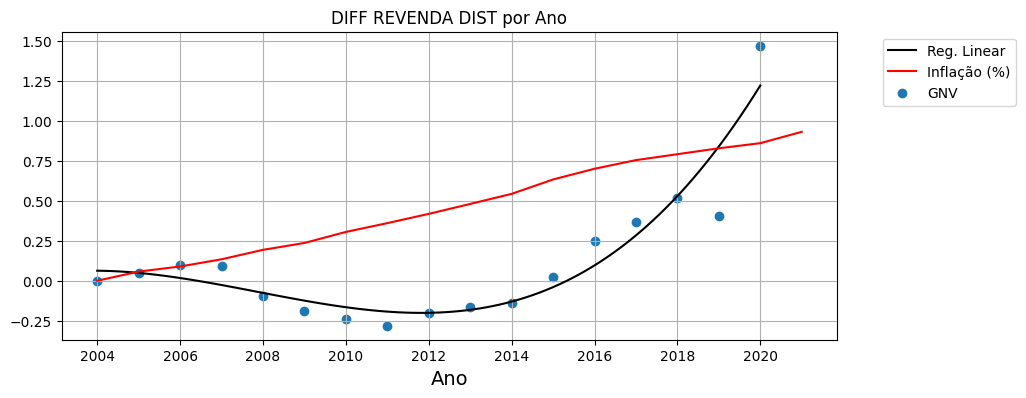

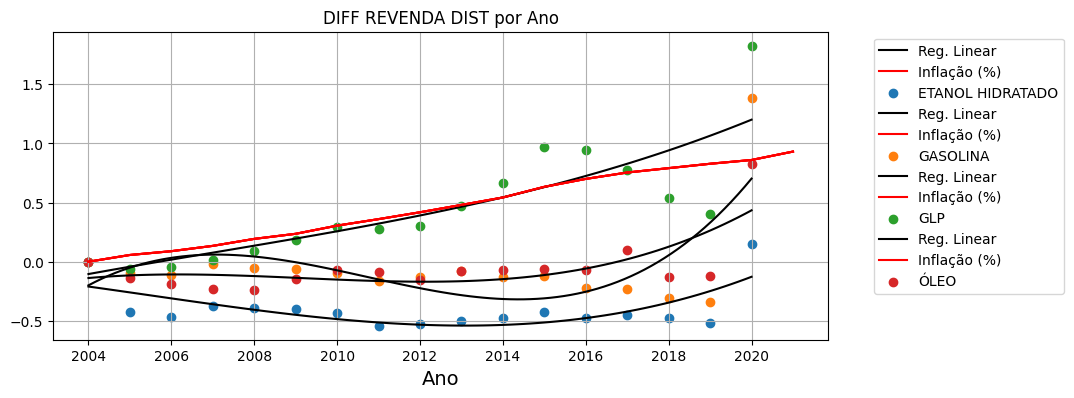

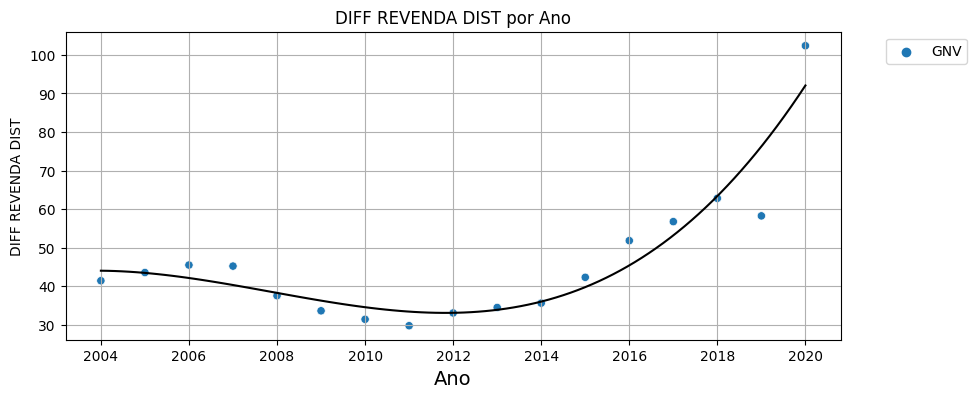

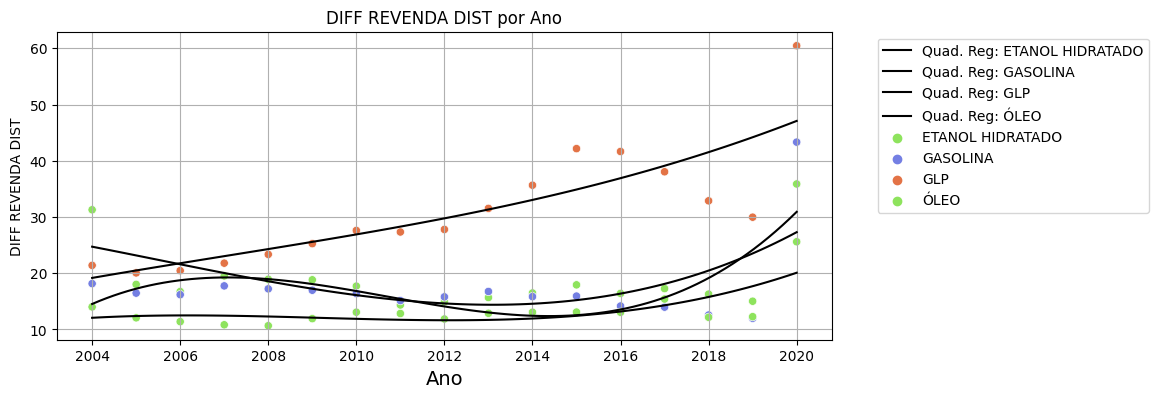

In [ ]:
agrup1 = 'PRODUTO'
step = 2
hue = agrup1
y_label = columns_to_fit[-1]
x_date = 'ANO INICIAL ZERO'
fuel_glp = df[[agrup1,y_label]].max().values[0]
do_fit = True
order_fit = 3
colors = [ '#8EE35D','#747FE3', '#E37346']
reg_poly_produto(df,agrup1,step,hue,y_label,x_date,fuel_glp,do_fit,order_fit,colors)

## A partir do gráfico abaixo, podemos notar que a variação relativa do Preço Médio de Distribuição por Ano para diferentes regiões do Brasil fica abaixo da Inflação acumulada, no geral, exceto para poucos anos específicos. O Preço Médio de Distribuição por Ano por região tem aproximadamente um comportamento aproximadamente linear, com uma pequena componente quadrática.

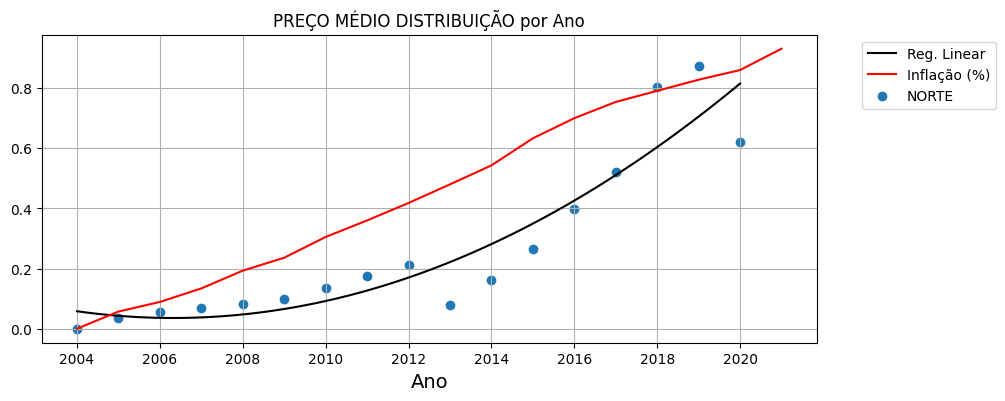

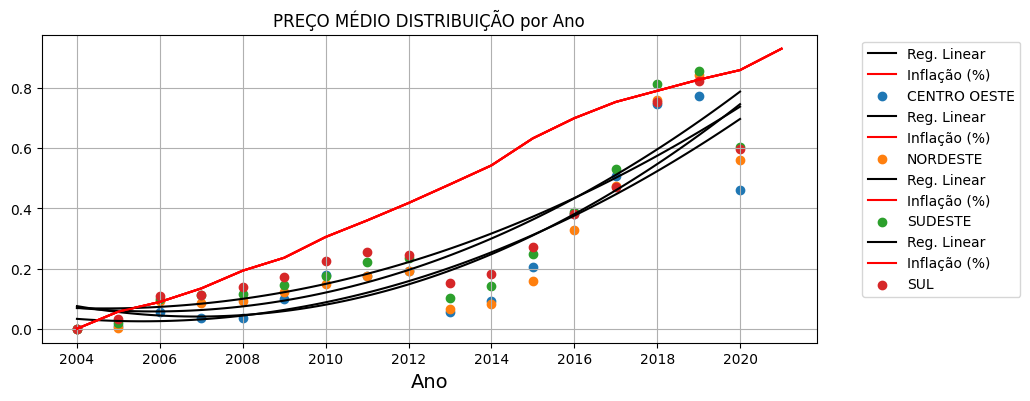

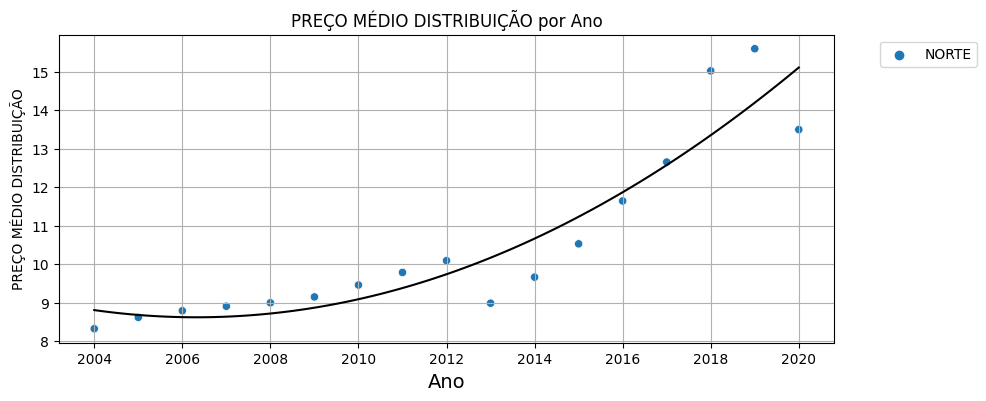

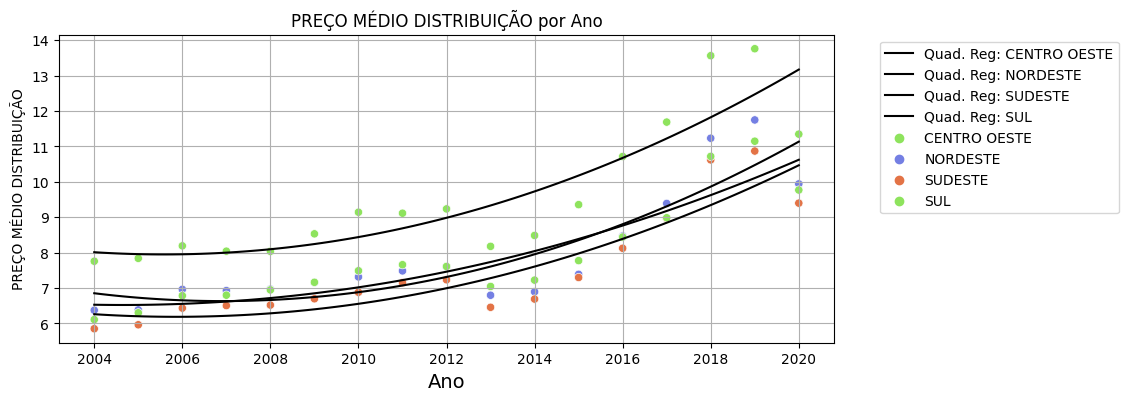

In [ ]:
agrup1 = 'REGIÃO'
step = 2
hue = agrup1
y_label = columns_to_fit[0]
x_date = 'ANO INICIAL ZERO'
fuel_glp = df[[agrup1,y_label]].max().values[0]
do_fit = True
order_fit = 2
colors = [ '#8EE35D','#747FE3', '#E37346']
reg_poly_produto(df,agrup1,step,hue,y_label,x_date,fuel_glp,do_fit,order_fit,colors)

## A partir do gráfico abaixo, podemos notar que a variação relativa da Diferença entre Revenda e Distribuição por Ano para diferentes regiões fica abaixo da Inflação acumulada, no geral, exceto para anos específicos. A Diferença entre Revenda e Distribuição por Ano por região tem aproximadamente um comportamento cúbico.

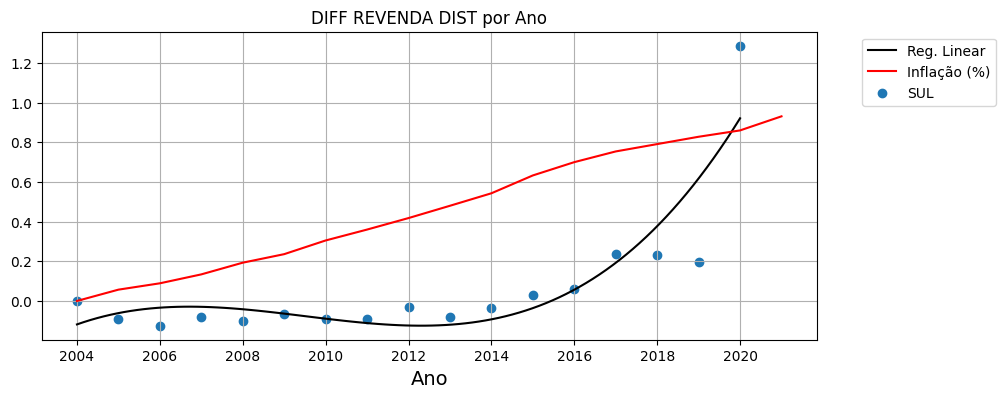

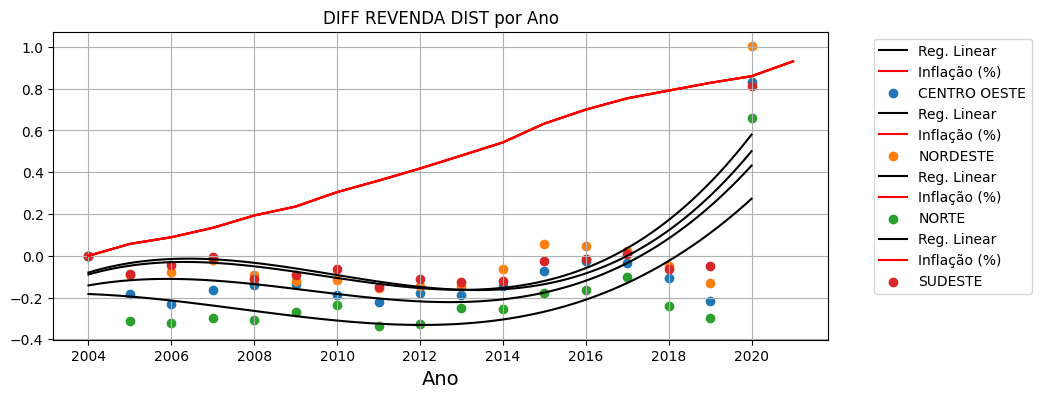

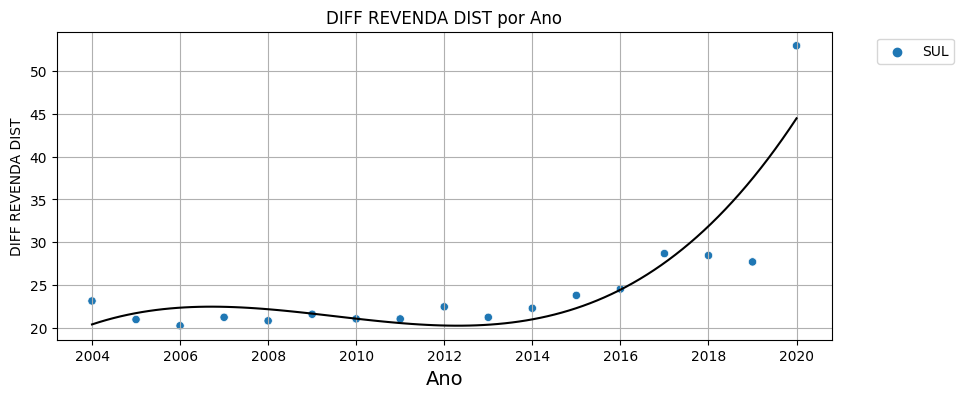

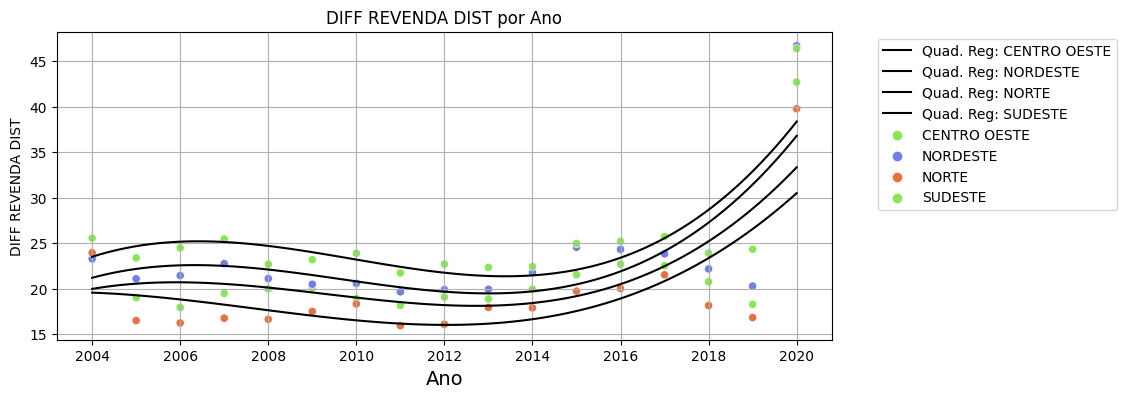

In [ ]:
agrup1 = 'REGIÃO'
step = 2
hue = agrup1
y_label = columns_to_fit[-1]
x_date = 'ANO INICIAL ZERO'
fuel_glp = df[[agrup1,y_label]].max().values[0]
do_fit = True
order_fit = 3
colors = [ '#8EE35D','#747FE3', '#E37346']
reg_poly_produto(df,agrup1,step,hue,y_label,x_date,fuel_glp,do_fit,order_fit,colors)

# Redução da Dimensionalidade com **PCA**

Com o intuito de visualizar esse conjunto de dados multidimensional, mesmo com alguns atributos altamente correlacionados, vamos utilizar *PCA*, ou Análise de Componentes Principais, para visualizar esse dataset a partir de visualizações bidimensionais. Vamos analisar a Variância Acumulada Explicada para todas as componentes principais e, em seguida, será feito um gráfico da primeira pela segunda componente em treino.

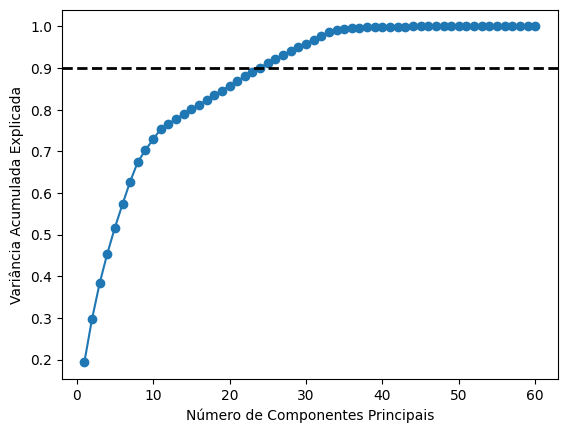

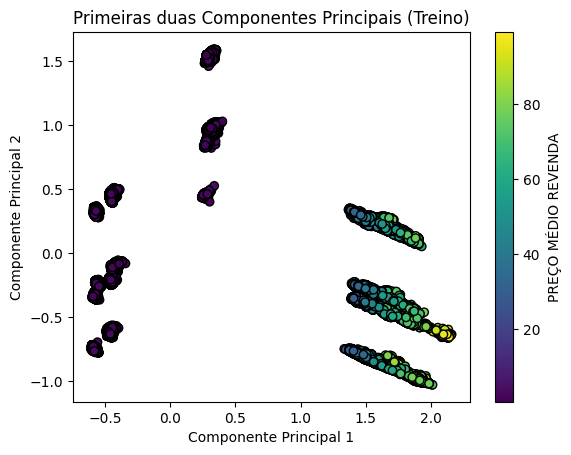

In [ ]:
df_final = df.copy()
df_final = df_final.drop(columns=['DATA INICIAL','DATA FINAL'])
df_final = pd.get_dummies(df_final)

y_target = 'PREÇO MÉDIO REVENDA'
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_final.drop(columns=y_target,axis=1), df_final[y_target],
                                                    test_size=0.2, random_state=42)

# Standardize the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Apply PCA on the training set
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Acumulada Explicada')
plt.axhline(y=0.9, color='black', linestyle='--', linewidth=2, label='Linha Horizontal')
plt.show()

# Plot the first two principal components for the test set
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolors='k')
plt.title('Primeiras duas Componentes Principais (Treino)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label=y_target)
plt.show()


## Agora, será feito um gráfico da terceira pela quarta componente em treino.

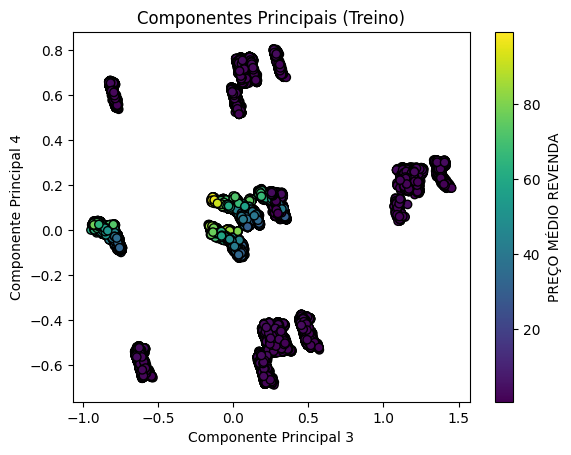

In [ ]:
# Plot two principal components for the test set
plt.scatter(X_train_pca[:, 2], X_train_pca[:, 3], c=y_train, cmap='viridis', edgecolors='k')
plt.title('Componentes Principais (Treino)')
plt.xlabel('Componente Principal 3')
plt.ylabel('Componente Principal 4')
plt.colorbar(label=y_target)
plt.show()


## Agora,será feito um gráfico da quinta pela sexta componente em treino.

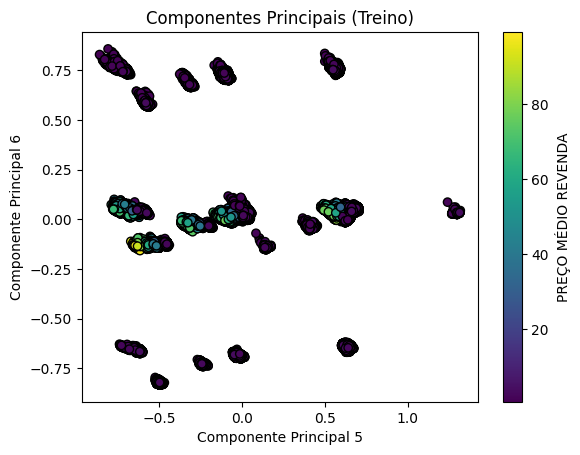

In [ ]:
# Plot two principal components for the test set
plt.scatter(X_train_pca[:, 4], X_train_pca[:, 5], c=y_train, cmap='viridis', edgecolors='k')
plt.title('Componentes Principais (Treino)')
plt.xlabel('Componente Principal 5')
plt.ylabel('Componente Principal 6')
plt.colorbar(label=y_target)
plt.show()


## Agora, será feito um gráfico da vigésima-terceira pela vigésima-quarta componente em treino.

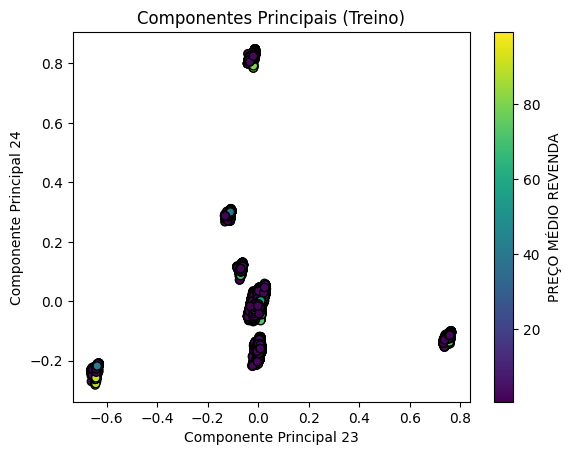

In [ ]:
# Plot two principal components for the test set
plt.scatter(X_train_pca[:, 22], X_train_pca[:, 23], c=y_train, cmap='viridis', edgecolors='k')
plt.title('Componentes Principais (Treino)')
plt.xlabel('Componente Principal 23')
plt.ylabel('Componente Principal 24')
plt.colorbar(label=y_target)
plt.show()


## Agora,será feito um gráfico da vigésima-quinta pela vigésima-sexta componente em treino.

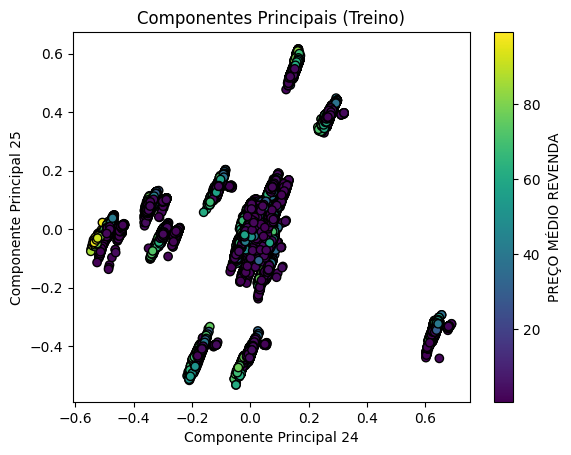

In [ ]:
# Plot two principal components for the test set
plt.scatter(X_train_pca[:, 24], X_train_pca[:, 25], c=y_train, cmap='viridis', edgecolors='k')
plt.title('Componentes Principais (Treino)')
plt.xlabel('Componente Principal 24')
plt.ylabel('Componente Principal 25')
plt.colorbar(label=y_target)
plt.show()


## Pelas Análises de PCA, nota-se que as primeiras componentes representam regiões no espaço onde o preço médio de revenda é mais homogêneo entre diferentes regiões, enquanto que para componentes com maior variância acumulada, como a vigésima-terceira em diante -  que tem uma variância acumulada maior do que 0.9 -, as regiões das projeções das componentes são bem heterogêneas.

# **Conclusões e Inferências Parciais**

1. Quais são as Regiões Brasileiras que tiveram o maior número de postos pesquisados, em média?
- Re: Foram as regiões Norte e Nordeste.
2. Quais foram os Produtos (combustíveis) com maior resposta no período de estudo?
- Re: Foram Óleo e Gasolina.
3. Como variou o número de repostas por Região, Estado e Unidade de Medida?
- Re: Vários estados apresentaram um alto, e igual, número de respostas na pesquisa, como, por exemplo, Paraíba, Santa Catarina, Rio de Janeiro, São Paulo e Rio Grande do Sul.
4. Como está a distribuição dos atributos? Há valores extremos? A que se assemelha essas distribuições? Como varia a faixa de valores coletados por atributo para diferentes unidades de medida, produtos, regiões e estados?
- Re: As distribuições dos dados parecem ser uma mistura de distribuições Gaussianas, Exponenciais e Log-Normais. Há bastante valores extremos no dataset em função de uma dada matiz, como, por exemplo, unidade de medida e produtos (combustíveis). No entanto, não removemos tais linhas no dataset, porque estaríamos transformando-o em uma série temporal irregular.
5. Como varia, em uma escala de mapa de cores, os valores do Preço de Distribuição e Revenda para diferentes Produtos (Combustíveis) e Unidades de Medida no Brasil? Quais os estados com os Preços maiores e menores, em média?
- Re: No geral, estados mais "distantes", como Acre, Roraima e Amapá têm Preços de Ditribuição e Revenda maiores, enquanto que São Paulo, Rio de Janeiro, Paraná e Bahia têm menores preços.
6. Como varia a Média de Postos Pesquisados por Ano para diferentes produtos?
- Re: Ela decai de uma maneira quase-linear com o passar dos anos.
7. Como se comporta a Média de Preço de Distribuição e Revenda por Ano para diferentes Produtos (Combustíveis)? E para o Preço Máximo e Mínimo de Distribuição e Revenda por Produto?
- Re: No geral, a Média de Preço de Distribuição e Revenda por Ano aumenta de uma maneira quadrática com o passar dos anos, comportamento esse notado também para Distribuição e Revenda para diferentes combustíveis. A diferença entre Revenda e Distribuição fica sempre maior do que 15%. Curiosamente, a diferença entre o Preço Máximo de Revenda e o Mínimo de Distribuição aumenta rapidamente com o passar dos anos.
8. Como varia o Preço Médio de Distribuição e Revenda com o passar dos anos para diferentes Produtos (Combustíveis)? Há como estabelecer alguma relação matemática, do tipo de regressão polinomial, entre a variação do Preço Médio com os anos? E se compararmos a variação do Preço desde 2004 (ano inicial da Pesquisa) com a Inflação acumulada no período?
- Re: O Preço Médio de Distribuição e Revenda aumenta em uma maneira quadrática com o passar dos anos para diferentes Produtos (Combustíveis), sendo que ele fica abaixo da Inflação acumulada para a maioria dos anos para o produto "R$\$$/13kg", enquanto que para "R$\$ $/l" e"R$\$ $/m3" o Preço fica acima da Inflação acumulada.
9. Há como visualizar os dados utilizando gráficos bidimensionais, mas mantendo o máximo possível de informação?
- Re: Utilizamos PCA para visualizar bidimensionalmente os dados. As duas primeiras componentes principais formam regiões onde claramente podemos ver diferentes valores do Preço Médio de Revenda - regiões homogêneas -, enquanto que para componentes que estão com variância acumulada maior do que cerca de 0,9, as regiões dos gráficos de tais projeções bidimensionais são bem heterogêneas.


# **Trabalhos Futuros**

- Criar uma aplicação com *Streamlit* para visualizar esses gráficos e insights na web;
- Criar *modelos estatísticos*, como ARIMA e SARIMAX, para prever, por exemplo, o Preço Médio de Revenda por Estado para uma determinada semana, em termos dos atributos de Distribuição, excluindo, convenientemente, as variáveis fortemente correlacionadas;
- Desenvolver análises em termos de médias móveis, no período mensal, e também em termos de suavização exponencial;
- Criar visualizações bidimensionais dos dados utilizando a técnica *t-SNE*.
- Na etapa de normalização dos dados, podemos utilizar como alternativa ao *MinMaxScaler* o **RobustScaler**, o qual pode ser mais apropriado a esse dataset, tendo em vista que temos muitos outliers. O RobustScaler subtrai Q1, o primeiro quartil, dos dados e divide pelo intervalo inter-quartil, IQR, dado por Q3-Q1.